# 03 Tweets LDA

## LDA Topic Modelling LDA on Tweets during 2020Q1-2021Q3 

- https://malaya.readthedocs.io/en/latest/load-preprocessing.html
- https://malaya.readthedocs.io/en/latest/_modules/malaya/preprocessing.html#Tokenizer

In [1]:
#!pip3 install malaya
import malaya
malaya.__version__


'4.6'

# 1.0 Import Data

In [5]:
# import data for 2020Q1 - 2021Q3
import pandas as pd
import glob

path = r"Data/" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    tweets_df = pd.read_csv(filename, index_col=0, header=0)
    li.append(tweets_df)

tweets_df = pd.concat(li, axis=0, ignore_index=True)
tweets_df

,Period,GT,Tweet,wmdistance,id,conversation_id,created_at,date,time,timezone,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,Unnamed: 0.1
0,2020_Q1,"tatacara, kendali, piawai, makna, bahagian, ha...","covid, malaysia, moga, selamat, kes, perintah,...",2.790868,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020_Q2,"tatacara, kendali, piawai, malaysia, pkpb, cov...","kuala, lumpur, malaysia, raya, mysejahtera, me...",2.407878,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020_Q3,"tatacara, kendali, piawai, malaysia, pkpp, mak...","kes, sabah, kerja, kena, covid, mysejahtera, m...",2.812163,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020_Q4,"tatacara, kendali, piawai, pkpb, cmco, mkn, ma...","mco, kes, covid, sember, sebar, vaksin, mati, ...",2.486819,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021_Q1,"tatacara, kendali, piawai, malaysia, mco, tata...","vaksin, kes, mysejahtera, covid, daftar, selan...",2.342879,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300280,NaN,NaN,NaN,NaN,1.311466e+18,1.311341e+18,2020-10-01 08:39:36+08:00,2020-10-01,08:39:36,800.0,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'yusurisan', 'name': 'whothe_...",NaN,NaN,NaN,NaN,NaN
300281,NaN,NaN,NaN,NaN,1.311465e+18,1.311465e+18,2020-10-01 08:38:26+08:00,2020-10-01,08:38:26,800.0,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
300282,NaN,NaN,NaN,NaN,1.311460e+18,1.311460e+18,2020-10-01 08:17:59+08:00,2020-10-01,08:17:59,800.0,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
300283,NaN,NaN,NaN,NaN,1.311457e+18,1.311271e+18,2020-10-01 08:05:39+08:00,2020-10-01,08:05:39,800.0,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'sarahishak_', 'name': 'Caah'...",NaN,NaN,NaN,NaN,NaN


In [7]:
# sort data by date
tweets_df = tweets_df[['date','tweet']]
tweets_df



,date,tweet
0,2020-03-31,@aerilzafrel Assalam.. #stayathome #sweetbakeb...
1,2020-03-31,Pay attention to recession. Itu benda paling t...
2,2020-03-31,@nasrinasrinasri Lepas tapi mmg byk tnya gak l...
3,2020-03-31,"Semalam bibik cerita, orang kat Indonesia ni m..."
4,2020-03-31,@zieha_malek Hahahaha. Kannnn. Rmo or pkp ni b...
...,...,...
300273,2020-10-01,@yusurisan but still no cure @ antivirus for C...
300274,2020-10-01,"Januari,Februari,Mac,PKP PKP PKPD PKPD PKPP PK..."
300275,2020-10-01,Pls pls. Say not to PKP 2.0 hm
300276,2020-10-01,@sarahishak_ Dia bangga kot dgn bulu ketiak di...


In [8]:
# set date as index
tweets_df.set_index('date',inplace = True)
tweets_df

,tweet
date,
2020-03-31,@aerilzafrel Assalam.. #stayathome #sweetbakeb...
2020-03-31,Pay attention to recession. Itu benda paling t...
2020-03-31,@nasrinasrinasri Lepas tapi mmg byk tnya gak l...
2020-03-31,"Semalam bibik cerita, orang kat Indonesia ni m..."
2020-03-31,@zieha_malek Hahahaha. Kannnn. Rmo or pkp ni b...
...,...
2020-10-01,@yusurisan but still no cure @ antivirus for C...
2020-10-01,"Januari,Februari,Mac,PKP PKP PKPD PKPD PKPP PK..."
2020-10-01,Pls pls. Say not to PKP 2.0 hm


In [9]:
#tweets_df.groupby(['date'])
tweets_df = tweets_df.sort_values(by=['date'])
tweets_df

,tweet
date,
2020-01-01,#FMCo dengan rendah hati menerima watikah perl...
2020-01-01,@annosayo I took her in masa umur dia dalam 2 ...
2020-01-01,@brotherkappi dia ni tak vaksin ka
2020-01-01,"Sesungguhnya, nak hantar anak sekolah perlu ba..."
2020-01-01,Aku ada kenal seorang ‘ustazah’ ni. Sek sek st...
...,...
2021-09-30,Singaporean expecting a world class medical se...
2021-09-30,Dapatkan Diffenz drp saya selagi sok masih ada...
2021-09-30,"@azidamegat Saja nak provoke lah tu, dia tengo..."


# 2.0 Data Pre-processing

## 2.1 Conduct Pre-Precessing using NLTK Library

https://github.com/bicachu/short-text-topic-modeling-tutorial/blob/main/tweet_preprocessor.py


In [10]:
# run this code only for the first time
#!pip install tweet-preprocessor

In [11]:
import numpy as np
import re
import nltk
import gensim
import tqdm

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import trange, tqdm


# Download nltk word libraries if not present
# nltk.download('wordnet')
# nltk.download('stopwords')

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(
                token) > 2:  # drops words with 2 or less characters
            result.append(lemmatize_stemming(token))
    return result


def lemmatize_stemming(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')


def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers

    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization

#     if bigrams:
#         tweet_token_list = tweet_token_list + [tweet_token_list[i] + '_' + tweet_token_list[i + 1]
#                                                for i in range(len(tweet_token_list) - 1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [12]:
tweets_df['semiclean'] = tweets_df.tweet.apply(preprocess_tweet)
tweets_df['semiclean'].head()

date
2020-01-01    dengan rendah hati menerima watikah perlantika...
2020-01-01    take masa umur dia dalam bulan umur bulan june...
2020-01-01                                       dia tak vaksin
2020-01-01    sesungguhnya nak hantar anak sekolah perlu bag...
2020-01-01    aku ada kenal seorang ustazah sek sek style ad...
Name: semiclean, dtype: object

## 2.2 Conduct Pre-Precessing using Malaya Library

In [13]:
tweets_malay =tweets_df.semiclean.tolist()
tweets_malay

['dengan rendah hati menerima watikah perlantikan sebagai panel penasihat industri kepada salah satu fakulti universiti terkemuka asia iaitu universiti malaya',
 'take masa umur dia dalam bulan umur bulan june dia dah vaccine masa dia sihat dia mula end flu masa early october early nov mata dia dah mula cloudy masa syak dia fip tiga hari lepas dia mula lumpuh',
 'dia tak vaksin',
 'sesungguhnya nak hantar anak sekolah perlu bagi salinan rekod imunisasi anak kau yang lengkap mak bapak yang anti vaksin engko nak hantar anak sekolah macamana engko tak risau sebab memang taknak hantar anak sekolah supaya jadi benak macam kau jugak',
 'aku ada kenal seorang ustazah sek sek style ada sorang jugak jenis bila menyembang bahasakan diri sendiri ustazah konon buat sevice rawatan sunnah memang dia puak anti vaksin sebab nak suruh orang makan makanan sunnah dia',
 'kena masuk jalan tabligh baru kena',
 'pabila org asyik cakap plhiv distigmakan kerana tiada vaccine cure dan kerana sumber jangkitan i

In [14]:
import re
import json
import ftfy
import html
from functools import lru_cache
from unidecode import unidecode
from malaya.text.rules import rules_normalizer
from malaya.text.regex import _expressions, _money
from malaya.text.english.words import words as _english_words
from malaya.path import PATH_PREPROCESSING, S3_PATH_PREPROCESSING
from malaya.function import check_file, validator
from herpetologist import check_type
from typing import Tuple, List

_annotate = [
    'hashtag',
    'allcaps',
    'elongated',
    'repeated',
    'emphasis',
    'censored',
]

_normalize = list(_expressions.keys())


def get_normalize():
    return _normalize


def get_annotate():
     return _annotate


def _case_of(text):
    return (
        str.upper
        if text.isupper()
        else str.lower
        if text.islower()
        else str.title
        if text.istitle()
        else str
    )


def unpack_english_contractions(text):
    """
    Replace *English* contractions in ``text`` str with their unshortened forms.
    N.B. The "'d" and "'s" forms are ambiguous (had/would, is/has/possessive),
    so are left as-is.
    Important Note: The function is taken from textacy (https://github.com/chartbeat-labs/textacy).
    """

    text = re.sub(
        r"(\b)([Aa]re|[Cc]ould|[Dd]id|[Dd]oes|[Dd]o|[Hh]ad|[Hh]as|[Hh]ave|[Ii]s|[Mm]ight|[Mm]ust|[Ss]hould|[Ww]ere|[Ww]ould)n't",
        r'\1\2 not',
        text,
    )
    text = re.sub(
        r"(\b)([Hh]e|[Ii]|[Ss]he|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'ll",
        r'\1\2 will',
        text,
    )
    text = re.sub(
        r"(\b)([Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'re", r'\1\2 are', text
    )
    text = re.sub(
        r"(\b)([Ii]|[Ss]hould|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Ww]ould|[Yy]ou)'ve",
        r'\1\2 have',
        text,
    )
    text = re.sub(r"(\b)([Cc]a)n't", r'\1\2n not', text)
    text = re.sub(r"(\b)([Ii])'m", r'\1\2 am', text)
    text = re.sub(r"(\b)([Ll]et)'s", r'\1\2 us', text)
    text = re.sub(r"(\b)([Ww])on't", r'\1\2ill not', text)
    text = re.sub(r"(\b)([Ss])han't", r'\1\2hall not', text)
    text = re.sub(r"(\b)([Yy])(?:'all|a'll)", r'\1\2ou all', text)
    return text



def _get_expression_dict():
    return {
        k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
    }


class Tokenizer:
    def __init__(self, lowercase=False, **kwargs):
        """
        Load Tokenizer object.
        Check supported regex pattern at https://github.com/huseinzol05/Malaya/blob/master/malaya/text/regex.py#L85

        Parameters
        ----------
        lowercase: bool, optional (default=False)
            lowercase tokens.
        emojis: bool, optional (default=True)
            True to keep emojis.
        urls: bool, optional (default=True)
            True to keep urls.
        tags: bool, optional (default=True)
            True to keep tags: <tag>.
        emails: bool, optional (default=True)
            True to keep emails.
        users: bool, optional (default=True)
            True to keep users handles: @cbaziotis.
        hashtags: bool, optional (default=True)
            True to keep hashtags.
        phones: bool, optional (default=True)
            True to keep phones.
        percents: bool, optional (default=True)
            True to keep percents.
        money: bool, optional (default=True)
            True to keep money expressions.
        date: bool, optional (default=True)
            True to keep date expressions.
        time: bool, optional (default=True)
            True to keep time expressions.
        acronyms: bool, optional (default=True)
            True to keep acronyms.
        emoticons: bool, optional (default=True)
            True to keep emoticons.
        censored: bool, optional (default=True)
            True to keep censored words: f**k.
        emphasis: bool, optional (default=True)
            True to keep words with emphasis: *very* good.
        numbers: bool, optional (default=True)
            True to keep numbers.
        temperature: bool, optional (default=True)
            True to keep temperatures
        distance: bool, optional (default=True)
            True to keep distances.
        volume: bool, optional (default=True)
            True to keep volumes.
        duration: bool, optional (default=True)
            True to keep durations.
        weight: bool, optional (default=True)
            True to keep weights.
        hypen: bool, optional (default=True)
            True to keep hypens.
        """

        self.lowercase = lowercase
        pipeline = []
        self.regexes = _expressions

        emojis = kwargs.get('emojis', True)
        urls = kwargs.get('urls', True)
        tags = kwargs.get('tags', True)
        emails = kwargs.get('emails', True)
        users = kwargs.get('users', True)
        hashtags = kwargs.get('hashtags', True)
        cashtags = kwargs.get('cashtags', True)
        phones = kwargs.get('phones', True)
        percents = kwargs.get('percents', True)
        money = kwargs.get('money', True)
        date = kwargs.get('date', True)
        time = kwargs.get('time', True)
        acronyms = kwargs.get('acronyms', True)
        emoticons = kwargs.get('emoticons', True)
        censored = kwargs.get('censored', True)
        emphasis = kwargs.get('emphasis', True)
        numbers = kwargs.get('numbers', True)
        temperatures = kwargs.get('temperature', True)
        distances = kwargs.get('distance', True)
        volumes = kwargs.get('volume', True)
        durations = kwargs.get('duration', True)
        weights = kwargs.get('weight', True)
        hypens = kwargs.get('hypen', True)

        if urls:
            pipeline.append(self.regexes['url'])

        if tags:
            pipeline.append(self.regexes['tag'])

        if emails:
            pipeline.append(self.wrap_non_matching(self.regexes['email']))

        if users:
            pipeline.append(self.wrap_non_matching(self.regexes['user']))

        if hashtags:
            pipeline.append(self.wrap_non_matching(self.regexes['hashtag']))

        if cashtags:
            pipeline.append(self.wrap_non_matching(self.regexes['cashtag']))

        if phones:
            pipeline.append(self.wrap_non_matching(self.regexes['phone']))

        if percents:
            pipeline.append(self.wrap_non_matching(self.regexes['percent']))

        if money:
            pipeline.append(self.wrap_non_matching(self.regexes['money']))

        if date:
            pipeline.append(self.wrap_non_matching(self.regexes['date']))

        if time:
            pipeline.append(self.wrap_non_matching(self.regexes['time']))

        if acronyms:
            pipeline.append(self.wrap_non_matching(self.regexes['acronym']))

        if emoticons:
            pipeline.append(self.regexes['ltr_face'])
            pipeline.append(self.regexes['rtl_face'])

        if censored:
            pipeline.append(self.wrap_non_matching(self.regexes['censored']))

        if emphasis:
            pipeline.append(self.wrap_non_matching(self.regexes['emphasis']))

        if emoticons:
            pipeline.append(
                self.wrap_non_matching(self.regexes['rest_emoticons'])
            )

        if temperatures:
            pipeline.append(self.wrap_non_matching(self.regexes['temperature']))

        if distances:
            pipeline.append(self.wrap_non_matching(self.regexes['distance']))

        if volumes:
            pipeline.append(self.wrap_non_matching(self.regexes['volume']))

        if durations:
            pipeline.append(self.wrap_non_matching(self.regexes['duration']))

        if weights:
            pipeline.append(self.wrap_non_matching(self.regexes['weight']))

        if numbers:
            pipeline.append(self.regexes['number'])

        if emojis:
            pipeline.append(self.regexes['emoji'])

        if hypens:
            pipeline.append(self.regexes['hypen'])

        pipeline.append(self.regexes['word'])

        if emoticons:
            pipeline.append(
                self.wrap_non_matching(self.regexes['eastern_emoticons'])
            )

        # keep repeated puncts as one term
        # pipeline.append(r"")

        pipeline.append('(?:\\S)')  # CATCH ALL remaining terms

        self.tok = re.compile(r'({})'.format('|'.join(pipeline)))

    @staticmethod
    def wrap_non_matching(exp):
        return '(?:{})'.format(exp)

    def tokenize(self, text):
        """
        Tokenize string.

        Parameters
        ----------
        text : str

        Returns
        -------
        result: List[str]
        """
        escaped = html.unescape(text)
        tokenized = self.tok.findall(escaped)

        if self.lowercase:
            tokenized = [t.lower() for t in tokenized]

        return tokenized



class Preprocessing:
    def __init__(
        self,
        normalize=[
            'url',
            'email',
            'percent',
            'money',
            'phone',
            'user',
            'time',
            'date',
            'number',
        ],
        annotate=[
            'allcaps',
            'elongated',
            'repeated',
            'emphasis',
            'censored',
            'hashtag',
        ],
        lowercase=True,
        fix_unidecode=True,
        expand_english_contractions=True,
        translator=None,
        speller=None,
        segmenter=None,
        stemmer=None,
    ):
        self._fix_unidecode = fix_unidecode
        self._normalize = normalize
        self._annotate = annotate
        self._regexes = _get_expression_dict()
        self._tokenizer = Tokenizer(lowercase=lowercase).tokenize
        self._expand_contractions = expand_english_contractions
        self._all_caps_tag = 'wrap'
        self._translator = translator
        self._speller = speller
        self._segmenter = segmenter
        if self._segmenter:
            self._expand_hashtags = True
        else:
            self._expand_hashtags = False
        self._stemmer = stemmer

    def _add_special_tag(self, m, tag, mode='single'):

        if isinstance(m, str):
            text = m
        else:
            text = m.group()

        if mode == 'single':
            return ' {} <{}> '.format(text, tag)
        elif mode == 'wrap':
            return ' '.join([' <{}> {} </{}> '.format(tag, text, tag)]) + ' '
        elif mode == 'every':
            tokens = text.split()
            processed = ' '.join([' {} <{}> '.format(t, tag) for t in tokens])
            return ' ' + processed + ' '

    @lru_cache(maxsize=65536)
    def _handle_hashtag_match(self, m):
        expanded = m.group()[1:]
        if self._expand_hashtags:
            expanded = self._segmenter.segment([expanded])[0]
            expanded = ' '.join(expanded.split('-'))
            expanded = ' '.join(expanded.split('_'))

        if 'hashtag' in self._annotate:
            expanded = self._add_special_tag(expanded, 'hashtag', mode='wrap')

        return expanded

    @lru_cache(maxsize=65536)
    def _handle_repeated_puncts(self, m):
        text = m.group()
        text = ''.join(sorted(set(text), reverse=True))

        if 'repeated' in self._annotate:
            text = self._add_special_tag(text, 'repeated')

        return text

    @lru_cache(maxsize=65536)
    def _handle_generic_match(self, m, tag, mode='every'):
        text = m.group()
        text = self._add_special_tag(text, tag, mode=mode)

        return text

    def _handle_elongated_match(self, m):
        text = m.group()
        text = self._regexes['normalize_elong'].sub(r'\1\1', text)
        if self._speller and text.lower() not in _english_words:
            if hasattr(self._speller, 'normalize_elongated'):
                text = _case_of(text)(
                    self._speller.normalize_elongated(text.lower())
                )
            else:
                text = _case_of(text)(self._speller.correct(text.lower()))
        if 'elongated' in self._annotate:
            text = self._add_special_tag(text, 'elongated')
        return text

    @lru_cache(maxsize=65536)
    def _handle_emphasis_match(self, m):
        text = m.group().replace('*', '')
        if 'emphasis' in self._annotate:
            text = self._add_special_tag(text, 'emphasis')

        return text

    def _dict_replace(self, wordlist, _dict):
        return [_dict.get(w, w) for w in wordlist]

    @staticmethod
    def text(wordlist):
        in_hashtag = False
        _words = []
        for word in wordlist:

            if word == '<hashtag>':
                in_hashtag = True
            elif word == '</hashtag>':
                in_hashtag = False
            elif word in {'<allcaps>', '</allcaps>'} and in_hashtag:
                continue

            _words.append(word)

        return _words

    def process(self, text):
        text = re.sub(r' +', ' ', text)
        if self._fix_unidecode:
            text = ftfy.fix_text(text)

        for item in self._normalize:
            text = self._regexes[item].sub(
                lambda m: ' ' + '<' + item + '>' + ' ', text
            )

        text = self._regexes['hashtag'].sub(
            lambda w: self._handle_hashtag_match(w), text
        )

        if 'allcaps' in self._annotate:
            text = self._regexes['allcaps'].sub(
                lambda w: self._handle_generic_match(
                    w, 'allcaps', mode=self._all_caps_tag
                ),
                text,
            )
        if 'elongated' in self._annotate:
            text = self._regexes['elongated'].sub(
                lambda w: self._handle_elongated_match(w), text
            )
        if 'repeated' in self._annotate:
            text = self._regexes['repeat_puncts'].sub(
                lambda w: self._handle_repeated_puncts(w), text
            )
        if 'emphasis' in self._annotate:
            text = self._regexes['emphasis'].sub(
                lambda w: self._handle_emphasis_match(w), text
            )
        if 'censored' in self._annotate:
            text = self._regexes['censored'].sub(
                lambda w: self._handle_generic_match(w, 'censored'), text
            )
        if self._expand_contractions:
            text = unpack_english_contractions(text)

        text = re.sub(r' +', ' ', text)
        text = self.text(text.split())
        text = ' '.join(text)
        text = self._tokenizer(text)
        text = self._dict_replace(text, rules_normalizer)
        if self._translator:
            text = self._dict_replace(text, self._translator)
        if self._stemmer:
            rejected = ['<', '</', '>', '>']
            text = [
                self._stemmer.stem(w)
                if (
                    w not in _english_words
                    and all([r not in w for r in rejected])
                )
                else w
                for w in text
            ]

        return text



def preprocessing(
    normalize: List[str] = [
        'url',
        'email',
        'percent',
        'money',
        'phone',
        'user',
        'time',
        'date',
        'number',
    ],
    annotate: List[str] = [
        'allcaps',
        'elongated',
        'repeated',
        'emphasis',
        'censored',
        'hashtag',
    ],
    lowercase: bool = True,
    fix_unidecode: bool = True,
    expand_english_contractions: bool = True,
    translate_english_to_bm: bool = True,
    speller=None,
    segmenter=None,
    stemmer=None,
    **kwargs,
):
    """
    Load Preprocessing class.

    Parameters
    ----------
    normalize: list
        normalizing tokens, can check all supported normalizing at `malaya.preprocessing.get_normalize()`.
    annotate: list
        annonate tokens <open></open>,
        only accept ['hashtag', 'allcaps', 'elongated', 'repeated', 'emphasis', 'censored'].
    lowercase: bool
    fix_unidecode: bool
    expand_english_contractions: bool
        expand english contractions
    translate_english_to_bm: bool
        translate english words to bahasa malaysia words
    speller: object
        spelling correction object, need to have a method `correct`
    segmenter: object
        segmentation object, need to have a method `segment`.
        If provide, it will expand hashtags, #mondayblues == monday blues
    stemmer: object
        stemmer object, need to have a method `stem`.
        If provide, it will stem or lemmatize the string.

    Returns
    -------
    result : malaya.preprocessing.Preprocessing class
    """

    if any([e not in _normalize for e in normalize]):
        raise ValueError(
            'normalize element not able to recognize, supported normalization can check at get_normalize()'
        )
    if any([e not in _annotate for e in annotate]):
        raise ValueError(
            "annotate only accept ['hashtag', 'allcaps', 'elongated', 'repeated', 'emphasis', 'censored']"
        )
    validator.validate_object_methods(
        speller, ['correct', 'normalize_elongated'], 'speller'
    )
    validator.validate_object(segmenter, 'segment', 'segmenter')
    validator.validate_object(stemmer, 'stem', 'stemmer')

    if translate_english_to_bm:
        check_file(
            PATH_PREPROCESSING['english-malay'],
            S3_PATH_PREPROCESSING['english-malay'],
            **kwargs,
        )

        with open(PATH_PREPROCESSING['english-malay']['model']) as fopen:
            translator = json.load(fopen)
    else:
        translator = None

    return Preprocessing(
        
        normalize=normalize,
        annotate=annotate,
        lowercase=lowercase,
        fix_unidecode=fix_unidecode,
        expand_english_contractions=expand_english_contractions,
        translator=translator,
        speller=speller,
        segmenter=segmenter,
        stemmer=stemmer,
    )

## 2.2.1 Spelling Correction Normalized elongated words

In [15]:
corrector = malaya.spell.probability()

In [16]:
preprocessing = malaya.preprocessing.preprocessing(speller = corrector)

In [17]:
#pass in dataframe
tweets_df['normalize'] = tweets_df['semiclean'].apply(preprocessing.process)
tweets_df

,tweet,semiclean,normalize
date,,,
2020-01-01,#FMCo dengan rendah hati menerima watikah perl...,dengan rendah hati menerima watikah perlantika...,"[dengan, rendah, hati, menerima, watikah, perl..."
2020-01-01,@annosayo I took her in masa umur dia dalam 2 ...,take masa umur dia dalam bulan umur bulan june...,"[ambil, masa, umur, dia, dalam, bulan, umur, b..."
2020-01-01,@brotherkappi dia ni tak vaksin ka,dia tak vaksin,"[dia, tidak, vaksin]"
2020-01-01,"Sesungguhnya, nak hantar anak sekolah perlu ba...",sesungguhnya nak hantar anak sekolah perlu bag...,"[sesungguhnya, nak, hantar, anak, sekolah, per..."
2020-01-01,Aku ada kenal seorang ‘ustazah’ ni. Sek sek st...,aku ada kenal seorang ustazah sek sek style ad...,"[aku, ada, kenal, seorang, ustazah, sek, sek, ..."
...,...,...,...
2021-09-30,Singaporean expecting a world class medical se...,singaporean expect world class medical service...,"[singaporean, sangka, dunia, kelas, medical, p..."
2021-09-30,Dapatkan Diffenz drp saya selagi sok masih ada...,dapatkan diffenz drp saya selagi sok masih ada...,"[dapatkan, diffenz, drp, saya, selagi, sok, ma..."
2021-09-30,"@azidamegat Saja nak provoke lah tu, dia tengo...",saja nak provoke lah dia tengok vaksin remaja ...,"[sahaja, nak, memprovokasi, lah, dia, tengok, ..."


### 2.2.2 Stemming and lemmatization 

In [18]:
sastrawi = malaya.stem.sastrawi()
preprocessing = malaya.preprocessing.preprocessing(stemmer = sastrawi)

In [19]:
# apply on dataframe
# convert normalize a string again
tweets_df['normalize_back_to_text'] = [' '.join(map(str, l)) for l in tweets_df['normalize']]

In [20]:
#pass in dataframe
tweets_df['lemma'] = tweets_df['normalize_back_to_text'].apply(preprocessing.process)

In [21]:
tweets_df[10:60]

,tweet,semiclean,normalize,normalize_back_to_text,lemma
date,,,,,
2020-01-02,I'm craving for espresso shots but the one tha...,crave espresso shots vaccine shots prince cour...,"[mengidam, espresso, shots, vaksin, shots, put...",mengidam espresso shots vaksin shots putera ma...,"[idam, espresso, shots, vaksin, shots, putera,..."
2020-01-02,"Sbb smalam kena cucuk vaksin, harini merengek ...",sbb smalam kena cucuk vaksin harini merengek t...,"[sebab, smalam, kena, cucuk, vaksin, hari ini,...",sebab smalam kena cucuk vaksin hari ini mereng...,"[sebab, smalam, kena, cucuk, vaksin, hari, ini..."
2020-01-03,Aku takleh brain replies dekat bawah ni.. kena...,aku takleh brain reply dekat bawah kenapa masi...,"[aku, takleh, brain, jawapannya, dekat, bawah,...",aku takleh brain jawapannya dekat bawah kenapa...,"[aku, takleh, brain, jawapannya, dekat, bawah,..."
2020-01-03,dalam acc ada 150 jer. demi anak2 kucing nk va...,dalam acc ada jer demi anak kucing vaksin esok...,"[dalam, acc, ada, sahaja, demi, anak, kucing, ...",dalam acc ada sahaja demi anak kucing vaksin e...,"[dalam, acc, ada, sahaja, demi, anak, kucing, ..."
2020-01-03,Peliknya org tabligh ni jemput org pi surau ta...,peliknya org tabligh jemput org surau tapi jen...,"[peliknya, orang, tabligh, jemput, orang, sura...",peliknya orang tabligh jemput orang surau teta...,"[pelik, orang, tabligh, jemput, orang, surau, ..."
2020-01-03,Dad wants me to be vaccinated before i go back...,dad want vaccinate utp clinics stock anti infl...,"[ayah, mahu, vaccinate, utp, clinics, stok, an...",ayah mahu vaccinate utp clinics stok anti infl...,"[ayah, mahu, vaccinate, utp, clinics, stok, an..."
2020-01-03,@rizavexation @eyyyalisa Tipu. Ko memang anti ...,tipu memang anti feminist anti army anti vacci...,"[tipu, memang, anti, feminis, anti, tentera, a...",tipu memang anti feminis anti tentera anti vak...,"[tipu, memang, anti, finis, anti, tentera, ant..."
2020-01-03,"@lyys92 Lepas ni better pergi. Perlu cucuk, sb...",lepas better pergi perlu cucuk sbb bahaya caka...,"[lepas, lebih baik, pergi, perlu, cucuk, sebab...",lepas lebih baik pergi perlu cucuk sebab bahay...,"[lepas, lebih, baik, pergi, perlu, cucuk, seba..."
2020-01-03,baru ingt bulan neh nk vaksin anak kucing 😞,baru ingt bulan neh vaksin anak kucing,"[baru, ingat, bulan, nih, vaksin, anak, kucing]",baru ingat bulan nih vaksin anak kucing,"[baru, ingat, bulan, nih, vaksin, anak, kucing]"


## 2.2.3 Remove Malay Stopwords

- https://github.com/huseinzol05/malaya/blob/master/malaya/text/function.py
- https://github.com/huseinzol05/malaya/blob/master/malaya/text/tatabahasa.py

In [22]:
#!pip install more-itertools
import itertools
from itertools import permutations, combinations

In [23]:
# own stopword list
own_stopwords=["hashtag", "allcaps", "elongated", "repeated", "emphasis", "censored","percent","number","amp","guy","tengok","okay","biarlah","pergi","alhamdulillah"]

In [24]:
#original stopwords list
stopwords = malaya.text.tatabahasa.stopwords
stopwords.extend(own_stopwords)

In [25]:
from malaya.text.tatabahasa import (
    stopword_tatabahasa,
    stopwords,
    stopwords_calon,
    laughing,
    mengeluh,
)

from malaya.text.english.words import words as _english_words
from malaya.text.bahasa.words import words as _malay_words
from itertools import permutations, combinations

STOPWORDS = stopwords + stopword_tatabahasa + stopwords_calon
STOPWORD_CALON = set(stopwords_calon)


VOWELS = 'aeiou'
PHONES = ['sh', 'ch', 'ph', 'sz', 'cz', 'sch', 'rz', 'dz']
PUNCTUATION = '!"#$%&\'()*+,./:;<=>?@[\]^_`{|}~'
ENGLISH_WORDS = _english_words
MALAY_WORDS = _malay_words

In [26]:
len(STOPWORDS)

1453

In [27]:
def isword_english(word):
    if word:
        consecutiveVowels = 0
        consecutiveConsonents = 0
        for idx, letter in enumerate(word.lower()):
            vowel = True if letter in VOWELS else False
            if idx:
                prev = word[idx - 1]
                prevVowel = True if prev in VOWELS else False
                if not vowel and letter == 'y' and not prevVowel:
                    vowel = True
                if prevVowel != vowel:
                    consecutiveVowels = 0
                    consecutiveConsonents = 0
            if vowel:
                consecutiveVowels += 1
            else:
                consecutiveConsonents += 1
            if consecutiveVowels >= 3 or consecutiveConsonents > 3:
                return False
            if consecutiveConsonents == 3:
                subStr = word[idx - 2: idx + 1]
                if any(phone in subStr for phone in PHONES):
                    consecutiveConsonents -= 1
                    continue
                return False
    return True

def isword_malay(word):
    if re.sub('[^0-9!@#$%\\^&*()-=_\\+{}\\[\\];\':",./<>? ]+', '', word) == word:
        return True
    if not any([c in VOWELS for c in word]):
        return False
    return True

In [28]:
def malaya_textcleaning(string):
    """
    remove annotated 
    use by normalizer, spell
    remove links, hashtags, alias
    only accept A-Z, a-z
    remove any laugh
    remove any repeated char more than 2 times
    remove most of nonsense words
    """
    string = re.sub(
        'http\\S+|www.\\S+',
        '',
        ' '.join(
            [
                word
                for word in string.split()
                if word.find('#') < 0 and word.find('@') < 0
            ]
        ),
    )
    #string = re.sub('<>', ' ', string)
    string = unidecode(string).replace('.', '. ').replace(',', ' , ')
    string = re.sub('[^\'"A-Za-z\\- ]+', ' ', string)
    string = re.sub(r'[ ]+', ' ', string.lower()).strip()
    string = [word for word in string.lower().split() if isword_english(word)]
    
    string = [
        word
        for word in string
        if not any([laugh in word for laugh in laughing])
        and word[: len(word) // 2] != word[len(word) // 2:]
    ]
    string = ' '.join(string)
    string = (
        ''.join(''.join(s)[:2] for _, s in itertools.groupby(string))
    ).split()
    return ' '.join([word for word in string if word not in STOPWORDS])

In [29]:
# apply on dataframe
# convert lemma a string again
tweets_df['lemma_back_to_text'] = [' '.join(map(str, l)) for l in tweets_df['lemma']]

In [30]:
# if pass in list object -> 'list' object has no attribute 'split'
# so have to convert ['lemma'] to string 

tweets_df['nostop'] = tweets_df['lemma_back_to_text'].apply(malaya_textcleaning)


## 2.2.4 Tokenize

In [31]:
tokenizer = malaya.preprocessing.Tokenizer().tokenize

In [32]:
# Apply tokenizer on datframe
tweets_df['tokens'] = tweets_df['nostop'].apply(tokenizer)
tweets_df['tokens']

date
2020-01-01    [rendah, hati, terima, watikah, lantik, panel,...
2020-01-01    [ambil, umur, umur, jun, vaksin, sihat, selese...
2020-01-01                                             [vaksin]
2020-01-01    [hantar, anak, sekolah, salinan, rekod, imunis...
2020-01-01    [kenal, sek, sek, gaya, jenis, menyembang, bah...
                                    ...                        
2021-09-30    [singaporean, dunia, kelas, medical, khidmat, ...
2021-09-30    [diffenz, selagi, sok, pos, covid, shah, alam,...
2021-09-30    [provokasi, vaksin, remaja, laju, sambut, gala...
2021-09-30    [uji, jurutera, pil, horse, horse, parasites, ...
2021-09-30                            [bina, kumpul, community]
Name: tokens, Length: 300278, dtype: object

In [33]:
#Make tokens a string again
# use it to pass into wordcloud
tweets_df['tokens_to_text'] = [' '.join(map(str, l)) for l in tweets_df['tokens']]

In [34]:
print(tweets_df[['tokens_to_text']])

                                               tokens_to_text
date                                                         
2020-01-01  rendah hati terima watikah lantik panel nasiha...
2020-01-01  ambil umur umur jun vaksin sihat selesema earl...
2020-01-01                                             vaksin
2020-01-01  hantar anak sekolah salinan rekod imunisasi an...
2020-01-01  kenal sek sek gaya jenis menyembang bahasa kon...
...                                                       ...
2021-09-30  singaporean dunia kelas medical khidmat global...
2021-09-30    diffenz selagi sok pos covid shah alam malaysia
2021-09-30  provokasi vaksin remaja laju sambut galak data...
2021-09-30   uji jurutera pil horse horse parasites jual awam
2021-09-30                              bina kumpul community

[300278 rows x 1 columns]


In [35]:
tweets_df

,tweet,semiclean,normalize,normalize_back_to_text,lemma,lemma_back_to_text,nostop,tokens,tokens_to_text
date,,,,,,,,,
2020-01-01,#FMCo dengan rendah hati menerima watikah perl...,dengan rendah hati menerima watikah perlantika...,"[dengan, rendah, hati, menerima, watikah, perl...",dengan rendah hati menerima watikah perlantika...,"[dengan, rendah, hati, terima, watikah, lantik...",dengan rendah hati terima watikah lantik bagai...,rendah hati terima watikah lantik panel nasiha...,"[rendah, hati, terima, watikah, lantik, panel,...",rendah hati terima watikah lantik panel nasiha...
2020-01-01,@annosayo I took her in masa umur dia dalam 2 ...,take masa umur dia dalam bulan umur bulan june...,"[ambil, masa, umur, dia, dalam, bulan, umur, b...",ambil masa umur dia dalam bulan umur bulan jun...,"[ambil, masa, umur, dia, dalam, bulan, umur, b...",ambil masa umur dia dalam bulan umur bulan jun...,ambil umur umur jun vaksin sihat selesema earl...,"[ambil, umur, umur, jun, vaksin, sihat, selese...",ambil umur umur jun vaksin sihat selesema earl...
2020-01-01,@brotherkappi dia ni tak vaksin ka,dia tak vaksin,"[dia, tidak, vaksin]",dia tidak vaksin,"[dia, tidak, vaksin]",dia tidak vaksin,vaksin,[vaksin],vaksin
2020-01-01,"Sesungguhnya, nak hantar anak sekolah perlu ba...",sesungguhnya nak hantar anak sekolah perlu bag...,"[sesungguhnya, nak, hantar, anak, sekolah, per...",sesungguhnya nak hantar anak sekolah perlu bag...,"[sungguh, nak, hantar, anak, sekolah, perlu, b...",sungguh nak hantar anak sekolah perlu bagi sal...,hantar anak sekolah salinan rekod imunisasi an...,"[hantar, anak, sekolah, salinan, rekod, imunis...",hantar anak sekolah salinan rekod imunisasi an...
2020-01-01,Aku ada kenal seorang ‘ustazah’ ni. Sek sek st...,aku ada kenal seorang ustazah sek sek style ad...,"[aku, ada, kenal, seorang, ustazah, sek, sek, ...",aku ada kenal seorang ustazah sek sek gaya ada...,"[aku, ada, kenal, orang, ustazah, sek, sek, ga...",aku ada kenal orang ustazah sek sek gaya ada o...,kenal sek sek gaya jenis menyembang bahasa kon...,"[kenal, sek, sek, gaya, jenis, menyembang, bah...",kenal sek sek gaya jenis menyembang bahasa kon...
...,...,...,...,...,...,...,...,...,...
2021-09-30,Singaporean expecting a world class medical se...,singaporean expect world class medical service...,"[singaporean, sangka, dunia, kelas, medical, p...",singaporean sangka dunia kelas medical perkhid...,"[singaporean, sangka, dunia, kelas, medical, k...",singaporean sangka dunia kelas medical khidmat...,singaporean dunia kelas medical khidmat global...,"[singaporean, dunia, kelas, medical, khidmat, ...",singaporean dunia kelas medical khidmat global...
2021-09-30,Dapatkan Diffenz drp saya selagi sok masih ada...,dapatkan diffenz drp saya selagi sok masih ada...,"[dapatkan, diffenz, drp, saya, selagi, sok, ma...",dapatkan diffenz drp saya selagi sok masih ada...,"[dapat, diffenz, drp, saya, selagi, sok, masih...",dapat diffenz drp saya selagi sok masih ada da...,diffenz selagi sok pos covid shah alam malaysia,"[diffenz, selagi, sok, pos, covid, shah, alam,...",diffenz selagi sok pos covid shah alam malaysia
2021-09-30,"@azidamegat Saja nak provoke lah tu, dia tengo...",saja nak provoke lah dia tengok vaksin remaja ...,"[sahaja, nak, memprovokasi, lah, dia, tengok, ...",sahaja nak memprovokasi lah dia tengok vaksin ...,"[sahaja, nak, provokasi, lah, dia, tengok, vak...",sahaja nak provokasi lah dia tengok vaksin rem...,provokasi vaksin remaja laju sambut galak data...,"[provokasi, vaksin, remaja, laju, sambut, gala...",provokasi vaksin remaja laju sambut galak data...


In [ ]:
#export cleaned token tweets to csv 
#tweets_df.to_csv("tweets_clean_token.csv")


## 2.2.5 WordCloud

In [36]:
from wordcloud import WordCloud, STOPWORDS

# String together cleaned tokens from tweets
words_list = ' '.join(tweets_df['tokens_to_text']) 
stopwords = set(STOPWORDS)

# Word cloud configuration
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words_list)

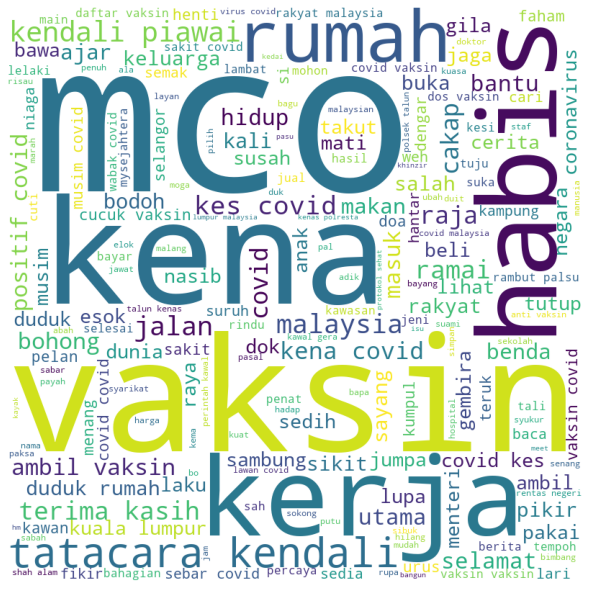

In [37]:
import matplotlib.pyplot as plt
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## 2.2.6 Build Bigram

In [38]:
tweets_df['tokens_to_text']

date
2020-01-01    rendah hati terima watikah lantik panel nasiha...
2020-01-01    ambil umur umur jun vaksin sihat selesema earl...
2020-01-01                                               vaksin
2020-01-01    hantar anak sekolah salinan rekod imunisasi an...
2020-01-01    kenal sek sek gaya jenis menyembang bahasa kon...
                                    ...                        
2021-09-30    singaporean dunia kelas medical khidmat global...
2021-09-30      diffenz selagi sok pos covid shah alam malaysia
2021-09-30    provokasi vaksin remaja laju sambut galak data...
2021-09-30     uji jurutera pil horse horse parasites jual awam
2021-09-30                                bina kumpul community
Name: tokens_to_text, Length: 300278, dtype: object

In [39]:
# convert 'tokens_to_text' from series into list
#this will pass into lda model
tweets_token_list_text = tweets_df['tokens_to_text'].tolist()
tweets_token_list_text

['rendah hati terima watikah lantik panel nasihat salah fakulti universiti muka asia universiti malaya',
 'ambil umur umur jun vaksin sihat selesema early oktober early nov mata mendung syak fip lumpuh',
 'vaksin',
 'hantar anak sekolah salinan rekod imunisasi anak anti vaksin hantar anak sekolah macamana risau hantar anak sekolah benak',
 'kenal sek sek gaya jenis menyembang bahasa konon sevice rawat sunnah puak anti vaksin suruh makan makan sunnah',
 'kena masuk jalan tabligh kena',
 'pabila asyik cakap stigma vaksin cure sumber ivdu seksual kank pendek stigma jaga selagi masyarakat pandang rendah kasihan stigma keka',
 'sunti vaksin vaksin pneumokokal staf peribadi hospital kosnya bahagian rawat utama universiti malaya',
 'sunti vaksin vaksin pneumokokal staf peribadi hospital kosnya universiti malaya medical ppum kuala lumpur kuala lumpur',
 'itchy',
 'idam shots vaksin shots putera mahkamah medical rasmi',
 'smalam kena cucuk vaksin rengek trok nanges',
 'takleh brain jawapannya s

In [40]:
tweets_df['tokens']

date
2020-01-01    [rendah, hati, terima, watikah, lantik, panel,...
2020-01-01    [ambil, umur, umur, jun, vaksin, sihat, selese...
2020-01-01                                             [vaksin]
2020-01-01    [hantar, anak, sekolah, salinan, rekod, imunis...
2020-01-01    [kenal, sek, sek, gaya, jenis, menyembang, bah...
                                    ...                        
2021-09-30    [singaporean, dunia, kelas, medical, khidmat, ...
2021-09-30    [diffenz, selagi, sok, pos, covid, shah, alam,...
2021-09-30    [provokasi, vaksin, remaja, laju, sambut, gala...
2021-09-30    [uji, jurutera, pil, horse, horse, parasites, ...
2021-09-30                            [bina, kumpul, community]
Name: tokens, Length: 300278, dtype: object

In [41]:
#turn tokens from series into list of list
tweets_token_list_of_list = tweets_df['tokens'].tolist()
tweets_token_list_of_list

[['rendah',
  'hati',
  'terima',
  'watikah',
  'lantik',
  'panel',
  'nasihat',
  'salah',
  'fakulti',
  'universiti',
  'muka',
  'asia',
  'universiti',
  'malaya'],
 ['ambil',
  'umur',
  'umur',
  'jun',
  'vaksin',
  'sihat',
  'selesema',
  'early',
  'oktober',
  'early',
  'nov',
  'mata',
  'mendung',
  'syak',
  'fip',
  'lumpuh'],
 ['vaksin'],
 ['hantar',
  'anak',
  'sekolah',
  'salinan',
  'rekod',
  'imunisasi',
  'anak',
  'anti',
  'vaksin',
  'hantar',
  'anak',
  'sekolah',
  'macamana',
  'risau',
  'hantar',
  'anak',
  'sekolah',
  'benak'],
 ['kenal',
  'sek',
  'sek',
  'gaya',
  'jenis',
  'menyembang',
  'bahasa',
  'konon',
  'sevice',
  'rawat',
  'sunnah',
  'puak',
  'anti',
  'vaksin',
  'suruh',
  'makan',
  'makan',
  'sunnah'],
 ['kena', 'masuk', 'jalan', 'tabligh', 'kena'],
 ['pabila',
  'asyik',
  'cakap',
  'stigma',
  'vaksin',
  'cure',
  'sumber',
  'ivdu',
  'seksual',
  'kank',
  'pendek',
  'stigma',
  'jaga',
  'selagi',
  'masyarakat',
 

In [42]:
tweets_token_list_of_list[0]

['rendah',
 'hati',
 'terima',
 'watikah',
 'lantik',
 'panel',
 'nasihat',
 'salah',
 'fakulti',
 'universiti',
 'muka',
 'asia',
 'universiti',
 'malaya']

In [43]:
tweets_df

,tweet,semiclean,normalize,normalize_back_to_text,lemma,lemma_back_to_text,nostop,tokens,tokens_to_text
date,,,,,,,,,
2020-01-01,#FMCo dengan rendah hati menerima watikah perl...,dengan rendah hati menerima watikah perlantika...,"[dengan, rendah, hati, menerima, watikah, perl...",dengan rendah hati menerima watikah perlantika...,"[dengan, rendah, hati, terima, watikah, lantik...",dengan rendah hati terima watikah lantik bagai...,rendah hati terima watikah lantik panel nasiha...,"[rendah, hati, terima, watikah, lantik, panel,...",rendah hati terima watikah lantik panel nasiha...
2020-01-01,@annosayo I took her in masa umur dia dalam 2 ...,take masa umur dia dalam bulan umur bulan june...,"[ambil, masa, umur, dia, dalam, bulan, umur, b...",ambil masa umur dia dalam bulan umur bulan jun...,"[ambil, masa, umur, dia, dalam, bulan, umur, b...",ambil masa umur dia dalam bulan umur bulan jun...,ambil umur umur jun vaksin sihat selesema earl...,"[ambil, umur, umur, jun, vaksin, sihat, selese...",ambil umur umur jun vaksin sihat selesema earl...
2020-01-01,@brotherkappi dia ni tak vaksin ka,dia tak vaksin,"[dia, tidak, vaksin]",dia tidak vaksin,"[dia, tidak, vaksin]",dia tidak vaksin,vaksin,[vaksin],vaksin
2020-01-01,"Sesungguhnya, nak hantar anak sekolah perlu ba...",sesungguhnya nak hantar anak sekolah perlu bag...,"[sesungguhnya, nak, hantar, anak, sekolah, per...",sesungguhnya nak hantar anak sekolah perlu bag...,"[sungguh, nak, hantar, anak, sekolah, perlu, b...",sungguh nak hantar anak sekolah perlu bagi sal...,hantar anak sekolah salinan rekod imunisasi an...,"[hantar, anak, sekolah, salinan, rekod, imunis...",hantar anak sekolah salinan rekod imunisasi an...
2020-01-01,Aku ada kenal seorang ‘ustazah’ ni. Sek sek st...,aku ada kenal seorang ustazah sek sek style ad...,"[aku, ada, kenal, seorang, ustazah, sek, sek, ...",aku ada kenal seorang ustazah sek sek gaya ada...,"[aku, ada, kenal, orang, ustazah, sek, sek, ga...",aku ada kenal orang ustazah sek sek gaya ada o...,kenal sek sek gaya jenis menyembang bahasa kon...,"[kenal, sek, sek, gaya, jenis, menyembang, bah...",kenal sek sek gaya jenis menyembang bahasa kon...
...,...,...,...,...,...,...,...,...,...
2021-09-30,Singaporean expecting a world class medical se...,singaporean expect world class medical service...,"[singaporean, sangka, dunia, kelas, medical, p...",singaporean sangka dunia kelas medical perkhid...,"[singaporean, sangka, dunia, kelas, medical, k...",singaporean sangka dunia kelas medical khidmat...,singaporean dunia kelas medical khidmat global...,"[singaporean, dunia, kelas, medical, khidmat, ...",singaporean dunia kelas medical khidmat global...
2021-09-30,Dapatkan Diffenz drp saya selagi sok masih ada...,dapatkan diffenz drp saya selagi sok masih ada...,"[dapatkan, diffenz, drp, saya, selagi, sok, ma...",dapatkan diffenz drp saya selagi sok masih ada...,"[dapat, diffenz, drp, saya, selagi, sok, masih...",dapat diffenz drp saya selagi sok masih ada da...,diffenz selagi sok pos covid shah alam malaysia,"[diffenz, selagi, sok, pos, covid, shah, alam,...",diffenz selagi sok pos covid shah alam malaysia
2021-09-30,"@azidamegat Saja nak provoke lah tu, dia tengo...",saja nak provoke lah dia tengok vaksin remaja ...,"[sahaja, nak, memprovokasi, lah, dia, tengok, ...",sahaja nak memprovokasi lah dia tengok vaksin ...,"[sahaja, nak, provokasi, lah, dia, tengok, vak...",sahaja nak provokasi lah dia tengok vaksin rem...,provokasi vaksin remaja laju sambut galak data...,"[provokasi, vaksin, remaja, laju, sambut, gala...",provokasi vaksin remaja laju sambut galak data...


In [44]:
# We use gensim for the bigram
# pass in list of list

# Build the bigram and trigram models
bigram = gensim.models.Phrases(tweets_token_list_of_list, min_count=5, threshold=100)
#trigram = gensim.models.Phrases(bigram[tweets_token_list_of_list], min_count=5, threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

#form bigram,trigram
tweets_df['bigram_token_list'] = [bigram_mod[line] for line in tweets_token_list_of_list]
#tweets_df['trigram_token_list'] = [trigram_mod[bigram_mod[line]] for line in tweets_token_list_of_list]


In [46]:
#processed_tweets = pd.DataFrame(tweets_df[['tweet','bigram_token_to_text']])

processed_tweets = pd.DataFrame(tweets_df[['tweet','bigram_token_list']])
processed_tweets

tweets_2020Q1_list =processed_tweets.loc['2020-01-01' : '2020-03-31']
tweets_2020Q2_list = processed_tweets.loc['2020-04-01' : '2020-06-30']
tweets_2020Q3_list = processed_tweets.loc['2020-07-01' : '2020-09-30']
tweets_2020Q4_list = processed_tweets.loc['2020-10-01' : '2020-12-31']
tweets_2021Q1_list = processed_tweets.loc['2021-01-01' : '2021-03-31']
tweets_2021Q2_list = processed_tweets.loc['2021-04-01' : '2021-06-30']
tweets_2021Q3_list = processed_tweets.loc['2021-07-01' : '2021-09-30']
tweets_full_list =processed_tweets.loc['1/1/2020' : '9/30/2021']

tweets_2020Q1_list.to_csv("tweets_2020Q1.csv")
tweets_2020Q2_list.to_csv("tweets_2020Q2.csv")
tweets_2020Q3_list.to_csv("tweets_2020Q3.csv")
tweets_2020Q4_list.to_csv("tweets_2020Q4.csv")
tweets_2021Q1_list.to_csv("tweets_2021Q1.csv")
tweets_2021Q2_list.to_csv("tweets_2021Q2.csv")
tweets_2021Q3_list.to_csv("tweets_2021Q3.csv")

In [47]:
tweets_full_list

,tweet,bigram_token_list
date,,
2020-01-01,#FMCo dengan rendah hati menerima watikah perl...,"[rendah, hati, terima, watikah, lantik, panel,..."
2020-01-01,@annosayo I took her in masa umur dia dalam 2 ...,"[ambil, umur, umur, jun, vaksin, sihat, selese..."
2020-01-01,@brotherkappi dia ni tak vaksin ka,[vaksin]
2020-01-01,"Sesungguhnya, nak hantar anak sekolah perlu ba...","[hantar, anak, sekolah, salinan, rekod, imunis..."
2020-01-01,Aku ada kenal seorang ‘ustazah’ ni. Sek sek st...,"[kenal, sek, sek, gaya, jenis, menyembang, bah..."
...,...,...
2021-09-30,Singaporean expecting a world class medical se...,"[singaporean, dunia, kelas, medical, khidmat, ..."
2021-09-30,Dapatkan Diffenz drp saya selagi sok masih ada...,"[diffenz, selagi, sok, pos, covid, shah_alam, ..."
2021-09-30,"@azidamegat Saja nak provoke lah tu, dia tengo...","[provokasi, vaksin, remaja, laju, sambut, gala..."


## 3.0 Gensim Topic Modellling

In [48]:
import pandas as pd
import nltk

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim_models
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
from spacy.tokenizer import Tokenizer

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import gensim
import gensim.corpora as corpora
from gensim import models
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# 3.1 LDA Tweets_2020Q1

In [49]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2020Q1_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2020Q1_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus_tfidf[:1]]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('asia', 0.2708947765221339),
  ('fakulti', 0.37246114217344733),
  ('hati', 0.1798514596929137),
  ('lantik', 0.2688428950307128),
  ('muka', 0.21517664057121733),
  ('nasihat', 0.22294344785541065),
  ('panel', 0.36095301958304576),
  ('rendah', 0.23730229925063562),
  ('salah', 0.16969017886314297),
  ('terima', 0.1518541683556312),
  ('universiti', 0.2650302096452331),
  ('universiti_malaya', 0.3242987158199079),
  ('watikah', 0.41640884037224085)]]

## 3.1.1 Finding Optimal Number of Topics for LDA based on Topic Coherence Score

In [51]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=97, passes=10)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


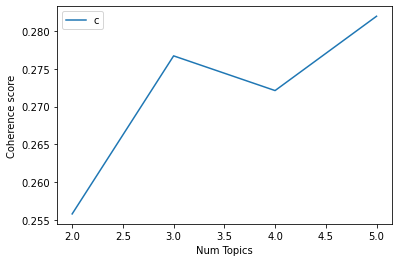

In [71]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2020Q1_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [72]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2558
Num Topics = 3  is having Coherence Value of 0.2767
Num Topics = 4  is having Coherence Value of 0.2721
Num Topics = 5  is having Coherence Value of 0.2819


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [194]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False,num_words=15)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.010*"covid" + 0.008*"malaysia" + 0.008*"moga" + 0.008*"selamat" + '
  '0.007*"kes" + 0.007*"perintah" + 0.006*"jaga" + 0.005*"sakit" + 0.005*"doa" '
  '+ 0.005*"virus" + 0.004*"mati" + 0.004*"mac" + 0.004*"wabak" + '
  '0.004*"bantu" + 0.004*"rumah"'),
 (1,
  '0.010*"coronavirus" + 0.008*"covid" + 0.005*"kes" + 0.005*"tabligh" + '
  '0.005*"malaysia" + 0.004*"sayang" + 0.004*"kasih" + 0.004*"terima" + '
  '0.004*"sebar" + 0.003*"uji" + 0.003*"china" + 0.003*"kemas" + 0.003*"mco" + '
  '0.003*"kerja" + 0.003*"virus"'),
 (2,
  '0.017*"covid" + 0.011*"rumah" + 0.010*"mco" + 0.009*"habis" + 0.009*"kena" '
  '+ 0.008*"makan" + 0.007*"kerja" + 0.005*"duduk" + 0.005*"april" + '
  '0.004*"musim" + 0.004*"tabligh" + 0.004*"anak" + 0.004*"raya" + '
  '0.004*"cuti" + 0.003*"beli"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.004*"covid" + 0.004*"jaga" + 0.003*"bandar" + 0.003*"selangor" + 0.003*"belanja" + 0.003*"sabar" + 0.003*"corona" + 0.003*"cegah" + 0.003*"lagu" + 0.003*"nikmat" + 0.002*"mari" + 0.002*"tangan" + 0.002*"italy" + 0.002*"allahu" + 0.002*"negatif"'),
 (1,
  '0.011*"malaysia" + 0.010*"covid" + 0.008*"kes" + 0.008*"selamat" + 0.007*"bantu" + 0.006*"moga" + 0.006*"perintah" + 0.006*"terima" + 0.006*"april" + 0.006*"mco" + 0.005*"kasih" + 0.005*"coronavirus" + 0.005*"raja" + 0.005*"rumah" + 0.004*"virus"'),
 (2,
  '0.016*"covid" + 0.012*"mco" + 0.012*"rumah" + 0.011*"habis" + 0.010*"kena" + 0.010*"makan" + 0.007*"kerja" + 0.006*"musim" + 0.006*"beli" + 0.006*"duduk" + 0.005*"raya" + 0.005*"tabligh" + 0.004*"ramai" + 0.004*"bodoh" + 0.004*"anak"')]

In [77]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2020Q1_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.34397149846112723


# 3.1.2 Intertopic Distance Map

In [75]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.158628  0.018763       1        1  35.912405
1      0.060356 -0.127132       2        1  32.739123
0      0.098271  0.108369       3        1  31.348472, topic_info=            Term        Freq       Total Category  logprob  loglift
571        habis  241.000000  241.000000  Default  30.0000  30.0000
638  coronavirus  270.000000  270.000000  Default  29.0000  29.0000
712         moga  204.000000  204.000000  Default  28.0000  28.0000
42         makan  228.000000  228.000000  Default  27.0000  27.0000
468        april  147.000000  147.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
716         arah   54.060613   79.896184   Topic3  -6.0815   0.7694
188    kesihatan   59.191804  108.927874   Topic3  -5.9908   0.5501
101        rumah   89.171676  460.882105   Topic3  -5.5811  -0.4826
445     keluarga   62.622804  138.236350   Topic3  -5.9345   0.3682
51          kena   65.041033  364.920579   Topic3  -5.8966  -0.5647

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1791      3  0.982066   aamiin
814       2  0.066117     amin
814       3  0.925641     amin
27        1  0.957861     anak
27        3  0.037198     anak
...     ...       ...      ...
1359      2  0.983824  workers
1359      3  0.044719  workers
1022      1  0.047438    wuhan
1022      2  0.877602    wuhan
1022      3  0.047438    wuhan

[383 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [196]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2020Q1.csv", index=False)

   Topic                                        Topic Words
0      0  covid, malaysia, moga, selamat, kes, perintah,...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.2 LDA Tweets_2020Q2

In [198]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2020Q2_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2020Q2_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


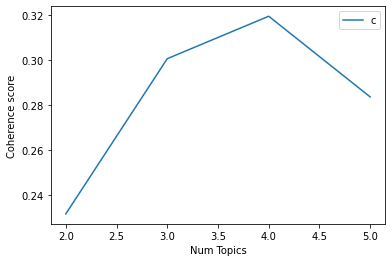

In [199]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2020Q2_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [201]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2315
Num Topics = 3  is having Coherence Value of 0.3007
Num Topics = 4  is having Coherence Value of 0.3196
Num Topics = 5  is having Coherence Value of 0.2837


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [212]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.011*"kuala_lumpur" + 0.011*"malaysia" + 0.010*"raya" + '
  '0.007*"mysejahtera" + 0.006*"mei" + 0.005*"shah_alam" + 0.004*"covid" + '
  '0.003*"makan" + 0.003*"mco" + 0.003*"selamat" + 0.002*"bosan" + '
  '0.002*"hikmah" + 0.002*"imbas" + 0.002*"petaling_jaya" + '
  '0.002*"penjara_sosial"'),
 (1,
  '0.015*"habis" + 0.011*"kerja" + 0.009*"kena" + 0.008*"rumah" + 0.008*"raya" '
  '+ 0.008*"beli" + 0.007*"makan" + 0.007*"musim" + 0.007*"mco" + '
  '0.006*"covid" + 0.005*"duit" + 0.005*"sambung" + 0.005*"kedai" + '
  '0.005*"buka" + 0.005*"anak"'),
 (2,
  '0.011*"selamat" + 0.009*"raya" + 0.007*"fasa" + 0.005*"puasa" + 0.005*"mco" '
  '+ 0.005*"rumah" + 0.004*"gembira" + 0.004*"phase" + 0.004*"ramadan" + '
  '0.004*"rindu" + 0.004*"syawal" + 0.004*"april" + 0.004*"aidilfitri" + '
  '0.004*"habis" + 0.003*"zahir_batin"'),
 (3,
  '0.025*"covid" + 0.015*"kes" + 0.007*"uji" + 0.006*"malaysia" + 0.005*"jun" '
  '+ 0.005*"piawai" + 0.005*"tatacara_kendali" + 0.004*"mco" + 0.004*"kena"

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
#fit corpus into model 
k = 5
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=90,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"raya" + 0.012*"selamat" + 0.009*"piawai" + 0.009*"tatacara_kendali" + 0.007*"gembira" + 0.006*"rentas_negeri" + 0.006*"cuti" + 0.005*"mysejahtera" + 0.005*"rumah" + 0.005*"covid" + 0.005*"ramadhan" + 0.005*"mco" + 0.005*"keluarga" + 0.004*"bapa" + 0.004*"kampung"'),
 (1,
  '0.012*"jun" + 0.006*"covid" + 0.006*"talun_kenas" + 0.006*"bhabinkamtibmas_desa" + 0.005*"makan" + 0.005*"tidur" + 0.004*"kec_hilir" + 0.004*"serdang" + 0.004*"polsek_talun" + 0.004*"kab_deli" + 0.004*"kahwin" + 0.004*"hikmah" + 0.004*"kait" + 0.004*"kenas_polresta" + 0.004*"pandemi"'),
 (2,
  '0.033*"covid" + 0.016*"kes" + 0.009*"malaysia" + 0.007*"uji" + 0.006*"positif" + 0.006*"negara" + 0.006*"virus" + 0.005*"vaksin" + 0.005*"sebar" + 0.005*"mati" + 0.005*"rakyat" + 0.005*"pandemik" + 0.005*"coronavirus" + 0.005*"pulih" + 0.004*"sakit"'),
 (3,
  '0.007*"mco" + 0.007*"covid" + 0.006*"kedai" + 0.006*"malaysia" + 0.006*"buka" + 0.005*"normal" + 0.005*"hidup" + 0.005*"kuala_lumpur" + 0.004*"pelan" + 0

In [85]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2020Q2_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.31082035339212943


In [209]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.061081  0.207882       1        1  30.536537
4     -0.121276 -0.101815       2        1  22.574960
3     -0.137423 -0.054640       3        1  21.016818
2      0.167299  0.046071       4        1  13.605287
0      0.152482 -0.097497       5        1  12.266398, topic_info=             Term         Freq        Total Category  logprob  loglift
69            kes   571.000000   571.000000  Default  30.0000  30.0000
0           covid  1702.000000  1702.000000  Default  29.0000  29.0000
368  kuala_lumpur   252.000000   252.000000  Default  28.0000  28.0000
16       malaysia   662.000000   662.000000  Default  27.0000  27.0000
275         habis   929.000000   929.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
246      selangor    36.238869   132.070880   Topic5  -6.3109   0.8051
103         harga    36.653032   192.565226   Topic5  -6.2995   0.4394
275         habis    40.127956   929.999238   Topic5  -6.2090  -1.0448
44          rumah    38.071357   773.665924   Topic5  -6.2616  -0.9134
142          kena    37.381653   707.993603   Topic5  -6.2798  -0.8429

[357 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
3300       2  0.151262       aidilfitri
3300       4  0.847065       aidilfitri
19901      2  0.125583  aidilfitri_maaf
19901      4  0.879081  aidilfitri_maaf
359        1  0.391289             ajar
...      ...       ...              ...
4137       4  0.968108             wehh
695        3  0.991099          workers
1123       4  0.979705            yeayy
23628      2  0.114272      zahir_batin
23628      4  0.879894      zahir_batin

[658 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

In [213]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2020Q2.csv", index=False)

   Topic                                        Topic Words
0      0  kuala, lumpur, malaysia, raya, mysejahtera, me...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.3 LDA tweets_2020Q3

In [76]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2020Q3_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2020Q3_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=97, passes=10)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


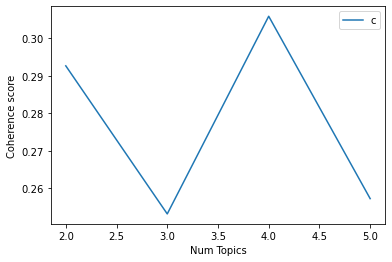

In [217]:

model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2020Q3_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [78]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2761
Num Topics = 3  is having Coherence Value of 0.2638
Num Topics = 4  is having Coherence Value of 0.3111
Num Topics = 5  is having Coherence Value of 0.281


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.008*"kes" + 0.007*"sabah" + 0.007*"kerja" + 0.007*"kena" + 0.007*"covid" '
  '+ 0.004*"mysejahtera" + 0.004*"malaysia" + 0.004*"habis" + 0.003*"pakai" + '
  '0.003*"masuk" + 0.003*"jalan" + 0.003*"ramai" + 0.003*"topeng" + '
  '0.003*"rumah" + 0.003*"moga"'),
 (1,
  '0.015*"covid" + 0.008*"mco" + 0.004*"sebar" + 0.004*"kes" + '
  '0.003*"tatacara_kendali" + 0.003*"piawai" + 0.003*"bhabinkamtibmas_desa" + '
  '0.003*"jawat" + 0.003*"rumah" + 0.003*"negeri" + 0.003*"kuarantin" + '
  '0.003*"sehat_cegah" + 0.003*"selamat" + 0.003*"musim" + 0.003*"kuasa"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
#fit corpus into model 
k = 2
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"kes" + 0.009*"kena" + 0.008*"sabah" + 0.008*"covid" + 0.008*"kerja" + 0.005*"malaysia" + 0.004*"rumah" + 0.004*"mysejahtera" + 0.004*"selamat" + 0.004*"takut" + 0.004*"susah" + 0.003*"habis" + 0.003*"niaga" + 0.003*"menteri" + 0.003*"ramai"'),
 (1,
  '0.017*"covid" + 0.011*"mco" + 0.008*"positif" + 0.006*"sebar" + 0.005*"thiago" + 0.004*"kawin" + 0.004*"gais" + 0.003*"makan" + 0.003*"kedah" + 0.003*"jalan" + 0.003*"bhabinkamtibmas_desa" + 0.003*"sehat_cegah" + 0.003*"rabu" + 0.003*"patuh_protokol" + 0.003*"cegah"')]

In [94]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2020Q3_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3602939352919969


In [222]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.088944  0.0       1        1  56.013722
1     -0.088944  0.0       2        1  43.986278, topic_info=                      Term        Freq       Total Category  logprob  loglift
6                      mco  172.000000  172.000000  Default  30.0000  30.0000
59                   kerja  163.000000  163.000000  Default  29.0000  29.0000
14                   covid  404.000000  404.000000  Default  28.0000  28.0000
1930  bhabinkamtibmas_desa   49.000000   49.000000  Default  27.0000  27.0000
634            sehat_cegah   45.000000   45.000000  Default  26.0000  26.0000
...                    ...         ...         ...      ...      ...      ...
367                positif   39.389572   80.656931   Topic2  -6.0668   0.1046
54                   jalan   37.631677  103.979249   Topic2  -6.1124  -0.1951
569                    uji   34.754053   79.144030   Topic2  -6.1920  -0.0017
492                  makan   34.606178   79.998361   Topic2  -6.1963  -0.0167
20                malaysia   35.049347  124.991736   Topic2  -6.1835  -0.4502

[166 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
4417      1  0.058156     adaptasi_terap
4417      2  0.988658     adaptasi_terap
494       1  0.062111               awan
494       2  0.931671               awan
336       1  0.957145             barang
...     ...       ...                ...
1709      1  0.154253               undi
1709      2  0.848394               undi
197       1  0.513512             vaksin
197       2  0.489059             vaksin
2230      2  0.962246  vincent_aluminium

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [221]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2020Q3.csv", index=False)

   Topic                                        Topic Words
0      0  kes, sabah, kerja, kena, covid, mysejahtera, m...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.4 LDA Tweets_2020Q4

In [223]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2020Q4_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2020Q4_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


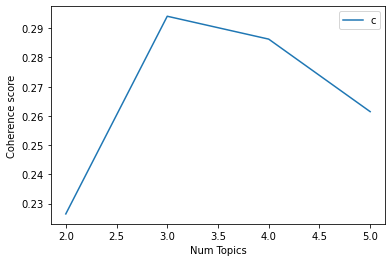

In [224]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2020Q4_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [99]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2271
Num Topics = 3  is having Coherence Value of 0.3019
Num Topics = 4  is having Coherence Value of 0.2789
Num Topics = 5  is having Coherence Value of 0.2465


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.013*"mco" + 0.010*"kes" + 0.007*"covid" + 0.006*"sember" + 0.004*"sebar" '
  '+ 0.004*"vaksin" + 0.004*"mati" + 0.004*"negeri" + 0.004*"cuti" + '
  '0.004*"pikir" + 0.003*"pecah" + 0.003*"rumah" + 0.003*"baharu" + '
  '0.003*"patuh_protokol" + 0.003*"tutup"'),
 (1,
  '0.023*"covid" + 0.014*"vaksin" + 0.009*"kena" + 0.007*"kes" + '
  '0.006*"malaysia" + 0.006*"kerja" + 0.005*"rakyat" + 0.005*"sabah" + '
  '0.005*"uji" + 0.005*"positif" + 0.005*"selamat" + 0.004*"moga" + '
  '0.004*"sakit" + 0.004*"menteri" + 0.004*"masuk"'),
 (2,
  '0.011*"habis" + 0.007*"covid" + 0.007*"kes" + 0.006*"musim" + 0.005*"beli" '
  '+ 0.005*"jalan" + 0.005*"rumah" + 0.005*"hidup" + 0.005*"kena" + '
  '0.005*"piawai" + 0.005*"tatacara_kendali" + 0.004*"makan" + 0.004*"kerja" + '
  '0.004*"selangor" + 0.004*"duit"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"mco" + 0.008*"sember" + 0.007*"selangor" + 0.006*"cuti" + 0.005*"sebar" + 0.005*"negeri" + 0.005*"covid" + 0.005*"kuala_lumpur" + 0.004*"pecah" + 0.004*"kes" + 0.003*"pikir" + 0.003*"malaysia" + 0.003*"patuh_protokol" + 0.003*"bayi" + 0.003*"esok"'),
 (1,
  '0.027*"covid" + 0.016*"vaksin" + 0.014*"kes" + 0.009*"kena" + 0.007*"positif" + 0.006*"kerja" + 0.006*"malaysia" + 0.005*"selamat" + 0.005*"sakit" + 0.005*"uji" + 0.005*"moga" + 0.005*"jaga" + 0.005*"piawai" + 0.005*"tatacara_kendali" + 0.005*"ramai"'),
 (2,
  '0.013*"habis" + 0.009*"musim" + 0.008*"jalan" + 0.007*"makan" + 0.006*"beli" + 0.005*"covid" + 0.005*"kedai" + 0.004*"sambung" + 0.004*"tali" + 0.004*"rumah" + 0.004*"gembira" + 0.004*"niaga" + 0.003*"lari" + 0.003*"buka" + 0.003*"cegah"')]

In [102]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2020Q4_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3208986293172882


In [103]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.057494 -0.138140       1        1  40.98625
2     -0.095504  0.117010       2        1  30.78633
0      0.152998  0.021129       3        1  28.22742, topic_info=         Term        Freq       Total Category  logprob  loglift
54        mco  256.000000  256.000000  Default  30.0000  30.0000
9       habis  226.000000  226.000000  Default  29.0000  29.0000
457    vaksin  444.000000  444.000000  Default  28.0000  28.0000
685    sember   97.000000   97.000000  Default  27.0000  27.0000
841     musim  128.000000  128.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
52      rumah   47.738282  197.840913   Topic3  -5.8692  -0.1569
210  malaysia   46.908190  213.214988   Topic3  -5.8867  -0.2492
5     positif   40.582713  172.928423   Topic3  -6.0316  -0.1847
903     bantu   35.237363   83.359140   Topic3  -6.1728   0.4038
123     hidup   35.371661  152.206040   Topic3  -6.1690  -0.1944

[221 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
69        1  0.980975   ahli
69        2  0.015092   ahli
111       1  0.794155   ajar
111       2  0.156594   ajar
111       3  0.055926   ajar
...     ...       ...    ...
2955      2  0.972567   wira
556       3  0.966048    wow
2394      3  0.976511   yeah
2027      1  0.959929  zaman
2027      2  0.035553  zaman

[358 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [226]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2020Q4.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Topic                                        Topic Words
0      0  mco, kes, covid, sember, sebar, vaksin, mati, ...


## 3.5 LDA tweets_2021Q1

In [227]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2021Q1_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2021Q1_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


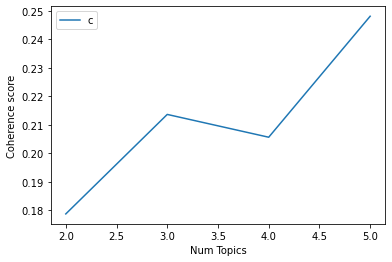

In [228]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2021Q1_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [229]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.1787
Num Topics = 3  is having Coherence Value of 0.2136
Num Topics = 4  is having Coherence Value of 0.2056
Num Topics = 5  is having Coherence Value of 0.2481


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.015*"vaksin" + 0.015*"kes" + 0.014*"mysejahtera" + 0.012*"covid" + '
  '0.012*"daftar" + 0.010*"selangor" + 0.009*"selangor_jurnal" + '
  '0.008*"malaysia" + 0.008*"percaya" + 0.006*"imbas" + 0.005*"mac" + '
  '0.005*"kena" + 0.004*"mati" + 0.004*"kemas" + 0.004*"vaccination"'),
 (1,
  '0.026*"mco" + 0.025*"vaksin" + 0.012*"sambung" + 0.009*"selamat" + '
  '0.007*"covid" + 0.005*"kena" + 0.005*"negeri" + 0.005*"makan" + '
  '0.005*"kerja" + 0.004*"rumah" + 0.004*"jalan" + 0.004*"ulang" + '
  '0.004*"ambil" + 0.004*"cucuk" + 0.004*"malaysia"'),
 (2,
  '0.014*"vaksin" + 0.011*"covid" + 0.006*"terima" + 0.005*"menteri" + '
  '0.005*"rakyat" + 0.005*"kena" + 0.005*"kes" + 0.004*"ambil" + 0.004*"kerja" '
  '+ 0.004*"raja" + 0.004*"sakit" + 0.004*"kasih" + 0.004*"ramai" + '
  '0.003*"dos" + 0.003*"bohong"'),
 (3,
  '0.024*"covid" + 0.012*"gembira" + 0.008*"kena" + 0.006*"uji" + '
  '0.006*"vaksin" + 0.005*"potong" + 0.004*"kerja" + 0.004*"mco" + '
  '0.004*"gaji" + 0.004*"hidup" + 

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
#fit corpus into model 
k = 5
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.036*"vaksin" + 0.016*"selangor_jurnal" + 0.015*"kes" + 0.015*"selangor" + 0.014*"percaya" + 0.012*"covid" + 0.008*"malaysia" + 0.005*"raya" + 0.005*"rentas_negeri" + 0.005*"baharu" + 0.004*"kahwin" + 0.004*"kesihatan" + 0.004*"program" + 0.004*"kuala_lumpur" + 0.004*"fasa"'),
 (1,
  '0.016*"mco" + 0.016*"daftar" + 0.015*"vaksin" + 0.010*"mysejahtera" + 0.009*"sambung" + 0.008*"cucuk" + 0.008*"covid" + 0.007*"selamat" + 0.007*"kerja" + 0.007*"dos" + 0.007*"kena" + 0.006*"mac" + 0.006*"ulang" + 0.005*"makan" + 0.005*"jalan"'),
 (2,
  '0.023*"vaksin" + 0.016*"covid" + 0.009*"ambil" + 0.008*"kena" + 0.007*"terima" + 0.006*"uji" + 0.006*"menteri" + 0.005*"anti" + 0.005*"rakyat" + 0.005*"sunti" + 0.005*"mati" + 0.005*"takut" + 0.005*"ramai" + 0.005*"kes" + 0.005*"piawai"'),
 (3,
  '0.022*"covid" + 0.013*"gembira" + 0.007*"mysejahtera" + 0.007*"vaksin" + 0.006*"negeri" + 0.006*"mco" + 0.006*"imbas" + 0.005*"emergency_cardio" + 0.005*"rentas" + 0.005*"saman" + 0.004*"aduh" + 0.004*"k

In [110]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2021Q1_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.2898822562013718


In [111]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.026801 -0.009838       1        1  26.420590
1      0.032612 -0.109770       2        1  20.481183
0      0.143108  0.081031       3        1  18.442289
4     -0.079953 -0.070973       4        1  18.284236
3     -0.122567  0.109550       5        1  16.371702, topic_info=             Term        Freq       Total Category  logprob  loglift
17    mysejahtera  220.000000  220.000000  Default  30.0000  30.0000
286           mco  671.000000  671.000000  Default  29.0000  29.0000
1572       daftar  214.000000  214.000000  Default  28.0000  28.0000
5         gembira  172.000000  172.000000  Default  27.0000  27.0000
96        sambung  236.000000  236.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
484         pakai   34.121326  128.370289   Topic5  -6.0203   0.4846
122         rumah   39.122355  273.255088   Topic5  -5.8835  -0.1341
7         positif   32.678815  157.270188   Topic5  -6.0635   0.2384
41          ramai   32.905742  210.865469   Topic5  -6.0566  -0.0480
256          beli   30.561745  177.590284   Topic5  -6.1305   0.0499

[377 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1117      1  0.254854           abah
1117      2  0.021238           abah
1117      4  0.148665           abah
1117      5  0.573421           abah
6880      1  0.950944  agenda_yahudi
...     ...       ...            ...
3295      1  0.906071           wehh
1003      1  0.195657            wow
1003      4  0.815239            wow
2480      2  0.898141           yeay
716       1  0.976619          yeayy

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

In [231]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2021Q1.csv", index=False)

   Topic                                        Topic Words
0      0  vaksin, kes, mysejahtera, covid, daftar, selan...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.6 LDA Tweets_2021Q2

In [232]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2021Q2_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2021Q2_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


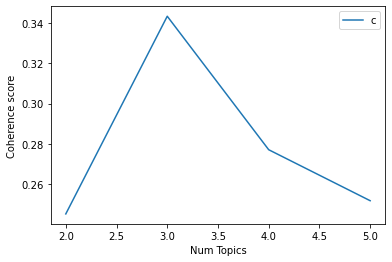

In [233]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2021Q2_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [234]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2454
Num Topics = 3  is having Coherence Value of 0.3433
Num Topics = 4  is having Coherence Value of 0.2772
Num Topics = 5  is having Coherence Value of 0.2519


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.020*"covid" + 0.015*"kes" + 0.008*"malaysia" + 0.008*"rakyat" + '
  '0.008*"raja" + 0.007*"jun" + 0.005*"mati" + 0.005*"kena" + '
  '0.005*"tatacara_kendali" + 0.005*"piawai" + 0.005*"turun" + 0.004*"negara" '
  '+ 0.004*"menteri" + 0.004*"vaksin" + 0.004*"kilang"'),
 (1,
  '0.037*"vaksin" + 0.011*"daftar" + 0.010*"ambil" + 0.009*"mysejahtera" + '
  '0.008*"dos" + 0.008*"habis" + 0.007*"kena" + 0.007*"cucuk" + 0.005*"raya" + '
  '0.005*"tarikh" + 0.005*"lantik" + 0.005*"anak" + 0.004*"semak" + '
  '0.004*"kemas" + 0.004*"ramai"'),
 (2,
  '0.016*"mco" + 0.010*"sambung" + 0.010*"kerja" + 0.006*"rumah" + '
  '0.005*"covid" + 0.005*"beli" + 0.005*"pakai" + 0.004*"makan" + 0.004*"kena" '
  '+ 0.004*"kuala_lumpur" + 0.004*"kedai" + 0.004*"bayar" + 0.004*"habis" + '
  '0.003*"esok" + 0.003*"cuti"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"covid" + 0.017*"kes" + 0.009*"malaysia" + 0.008*"jun" + 0.008*"rakyat" + 0.008*"raja" + 0.007*"turun" + 0.006*"bantu" + 0.005*"bodoh" + 0.004*"menteri" + 0.004*"negara" + 0.004*"hidup" + 0.004*"tarikh" + 0.004*"positif" + 0.004*"mati"'),
 (1,
  '0.041*"vaksin" + 0.013*"sambung" + 0.012*"ambil" + 0.010*"dos" + 0.010*"mysejahtera" + 0.009*"daftar" + 0.008*"cucuk" + 0.007*"terima" + 0.006*"tarikh" + 0.006*"kena" + 0.006*"kasih" + 0.006*"kemas" + 0.005*"lantik" + 0.005*"semak" + 0.005*"sakit"'),
 (2,
  '0.014*"mco" + 0.013*"habis" + 0.012*"kerja" + 0.010*"rumah" + 0.008*"kilang" + 0.007*"buka" + 0.007*"kena" + 0.007*"makan" + 0.006*"pakai" + 0.005*"beli" + 0.005*"tutup" + 0.005*"penat" + 0.005*"duit" + 0.005*"kedai" + 0.005*"esok"')]

In [118]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2021Q2_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.33092185330993457


In [119]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.189031 -0.082039       1        1  39.019066
1     -0.169585 -0.113917       2        1  33.151849
2     -0.019446  0.195956       3        1  27.829085, topic_info=          Term         Freq        Total Category  logprob  loglift
4       vaksin  2135.000000  2135.000000  Default  30.0000  30.0000
137        kes   849.000000   849.000000  Default  29.0000  29.0000
476        mco   642.000000   642.000000  Default  28.0000  28.0000
46     sambung   426.000000   426.000000  Default  27.0000  27.0000
49      daftar   514.000000   514.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
340       buka   107.373232   412.819261   Topic3  -5.9347  -0.0676
1018      duit    98.273527   207.928410   Topic3  -6.0233   0.5296
161      hidup   101.878298   315.634201   Topic3  -5.9872   0.1483
52    malaysia   101.631373   549.456198   Topic3  -5.9897  -0.4085
4       vaksin   102.417027  2135.994165   Topic3  -5.9820  -1.7585

[212 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1780      1  0.007200            abah
1780      2  0.993591            abah
1201      2  0.992119            adik
2039      2  0.986816            aduh
126       1  0.122753           ambil
...     ...       ...             ...
2263      3  0.980952       volunteer
5720      2  0.991891         website
9850      3  0.988421  wilayah_sekutu
822       2  0.061198           zaman
822       3  0.928166           zaman

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [120]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2021Q2.csv", index=False)

   Topic                                        Topic Words
0      0  covid, kes, malaysia, rakyat, raja, jun, mati,...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.7 LDA Tweets_2021Q3

In [121]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_2021Q3_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in tweets_2021Q3_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


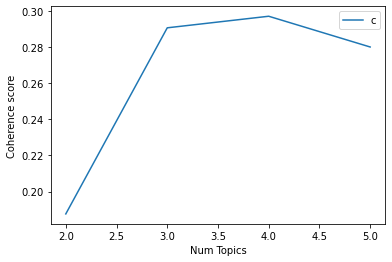

In [122]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=tweets_2021Q3_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [123]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.1876
Num Topics = 3  is having Coherence Value of 0.2907
Num Topics = 4  is having Coherence Value of 0.2971
Num Topics = 5  is having Coherence Value of 0.28


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.012*"covid" + 0.007*"uji" + 0.007*"kes" + 0.007*"positif" + '
  '0.006*"malaysia" + 0.005*"vaksin" + 0.005*"kena" + 0.005*"anak" + '
  '0.005*"tatacara_kendali" + 0.005*"piawai" + 0.005*"anti" + 0.004*"habis" + '
  '0.004*"ambil" + 0.004*"mati" + 0.003*"sekolah"'),
 (1,
  '0.019*"covid" + 0.008*"kes" + 0.007*"lindung" + 0.007*"moga" + '
  '0.006*"indonesia" + 0.005*"vaksin" + 0.005*"kerja" + 0.005*"hidup" + '
  '0.004*"kuala_lumpur" + 0.004*"terima" + 0.004*"keluarga" + 0.004*"rakyat" + '
  '0.004*"bantu" + 0.004*"vaksinasi" + 0.004*"mati"'),
 (2,
  '0.035*"vaksin" + 0.016*"dos" + 0.011*"mysejahtera" + 0.008*"cucuk" + '
  '0.008*"kena" + 0.007*"ambil" + 0.007*"tarikh" + 0.007*"do" + 0.006*"semak" '
  '+ 0.004*"sakit" + 0.004*"kemas" + 0.004*"fasa" + 0.004*"lantik" + '
  '0.004*"masuk" + 0.004*"esok"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"covid" + 0.008*"uji" + 0.008*"anak" + 0.007*"habis" + 0.006*"makan" + 0.006*"mco" + 0.006*"kena" + 0.005*"rumah" + 0.005*"kedai" + 0.005*"vaksin" + 0.004*"kerja" + 0.004*"kawan" + 0.004*"beli" + 0.004*"ambil" + 0.004*"dine"'),
 (1,
  '0.020*"covid" + 0.010*"lindung" + 0.009*"indonesia" + 0.008*"kes" + 0.007*"vaksin" + 0.006*"malaysia" + 0.006*"moga" + 0.005*"mati" + 0.005*"vaksinasi" + 0.005*"masyarakat" + 0.005*"papua" + 0.005*"selamat" + 0.004*"keluarga" + 0.004*"kerja" + 0.004*"rakyat"'),
 (2,
  '0.040*"vaksin" + 0.019*"dos" + 0.016*"mysejahtera" + 0.009*"semak" + 0.009*"ambil" + 0.008*"cucuk" + 0.008*"kemas" + 0.008*"do" + 0.007*"kena" + 0.006*"tarikh" + 0.005*"masuk" + 0.005*"sakit" + 0.005*"esok" + 0.004*"walk" + 0.004*"sijil"')]

In [126]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets_2021Q3_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.31145569468363615


In [127]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.144020 -0.101912       1        1  34.395843
2     -0.184795 -0.046646       2        1  33.967894
0      0.040775  0.148558       3        1  31.636264, topic_info=             Term         Freq        Total Category  logprob  loglift
17         vaksin  1704.000000  1704.000000  Default  30.0000  30.0000
1080          dos   624.000000   624.000000  Default  29.0000  29.0000
144   mysejahtera   437.000000   437.000000  Default  28.0000  28.0000
366         cucuk   316.000000   316.000000  Default  27.0000  27.0000
107           uji   249.000000   249.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
155          raja    93.392482   238.916428   Topic3  -5.9386   0.2116
811      keluarga    93.719169   266.924543   Topic3  -5.9351   0.1042
25          kerja    92.527082   385.389633   Topic3  -5.9479  -0.2759
185         sakit    89.910069   329.823889   Topic3  -5.9766  -0.1489
651         salah    82.219708   156.462844   Topic3  -6.0660   0.5074

[220 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1056      3  0.991557            amal
227       1  0.955172            aman
227       3  0.045484            aman
9839      1  0.988840      aman_halal
36        1  0.101653           ambil
...     ...       ...             ...
2614      1  0.007923            walk
2614      2  0.990364            walk
593       1  0.019976             weh
593       2  0.978818             weh
2074      1  0.982355  wilayah_sekutu

[327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [128]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_tweets_2021Q3.csv", index=False)

   Topic                                        Topic Words
0      0  covid, uji, kes, positif, malaysia, vaksin, ke...


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Tweet Full List

In [219]:
# Create dictionary 
id2word = corpora.Dictionary(tweets_full_list['bigram_token_list'])
#id2word.token2id

# bow
corpus = [id2word.doc2bow(doc) for doc in tweets_full_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(corpus) 

corpus_tfidf = tfidf[corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=30, passes=30)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Chosen # random state=30;pass=30

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


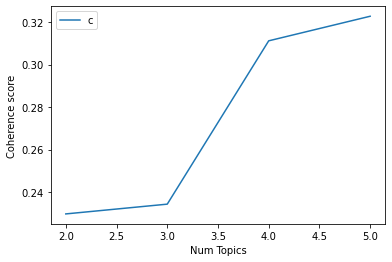

In [262]:
#chosen
#random state=30;pass=30
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts= tweets_full_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values) 
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc=    'best')
plt.show()

In [263]:
#chosen
#random state=30;pass=30
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2297
Num Topics = 3  is having Coherence Value of 0.2343
Num Topics = 4  is having Coherence Value of 0.3112
Num Topics = 5  is having Coherence Value of 0.3228


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
#chosen
#random state 30; pass=30
# 3 topic
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.015*"mco" + 0.013*"kes" + 0.008*"malaysia" + 0.008*"selangor" + '
  '0.006*"selamat" + 0.006*"covid" + 0.006*"sambung" + 0.006*"negeri" + '
  '0.005*"makan" + 0.005*"kuala_lumpur" + 0.004*"jun" + 0.004*"gembira" + '
  '0.004*"pikir" + 0.004*"kawasan" + 0.003*"rumah" + 0.003*"perintah" + '
  '0.003*"tidur" + 0.003*"kemas" + 0.003*"jalan" + 0.003*"nombor" + '
  '0.003*"shah_alam" + 0.003*"walk" + 0.003*"sayang" + 0.003*"rambut_palsu" + '
  '0.003*"bangun" + 0.003*"dine" + 0.003*"buka" + 0.003*"lari" + 0.002*"mac" + '
  '0.002*"hidup"'),
 (1,
  '0.049*"vaksin" + 0.022*"covid" + 0.013*"dos" + 0.008*"cucuk" + '
  '0.008*"ambil" + 0.007*"moga" + 0.007*"positif" + 0.007*"daftar" + '
  '0.007*"sakit" + 0.006*"terima" + 0.006*"uji" + 0.005*"tarikh" + 0.005*"do" '
  '+ 0.005*"mati" + 0.005*"kasih" + 0.005*"negara" + 0.004*"lindung" + '
  '0.004*"lantik" + 0.004*"percaya" + 0.004*"anti" + 0.004*"bantu" + '
  '0.004*"keluarga" + 0.004*"doa" + 0.003*"vaks" + 0.003*"malaysia" + '
  '0.003*

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
#chosen
#random state 30; pass=30
# 4 topic
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.020*"kes" + 0.013*"mco" + 0.012*"covid" + 0.012*"moga" + 0.010*"malaysia" '
  '+ 0.008*"selamat" + 0.007*"vaksin" + 0.007*"selangor" + '
  '0.006*"kuala_lumpur" + 0.006*"doa" + 0.005*"jun" + 0.005*"gembira" + '
  '0.005*"hidup" + 0.005*"sambung" + 0.005*"mati" + 0.004*"keluarga" + '
  '0.004*"terima" + 0.004*"negeri" + 0.004*"mudah" + 0.004*"walk" + '
  '0.004*"kasih" + 0.003*"positif" + 0.003*"sembuh" + 0.003*"turun" + '
  '0.003*"pikir" + 0.003*"julai" + 0.003*"urus" + 0.003*"sayang" + '
  '0.003*"jaya" + 0.003*"tarikh"'),
 (1,
  '0.063*"vaksin" + 0.027*"covid" + 0.024*"dos" + 0.015*"cucuk" + 0.010*"uji" '
  '+ 0.009*"do" + 0.007*"indonesia" + 0.007*"ambil" + 0.007*"fasa" + '
  '0.006*"sakit" + 0.006*"lindung" + 0.005*"demam" + 0.005*"positif" + '
  '0.005*"vaccination" + 0.005*"pfizer" + 0.005*"sinovac" + 0.004*"anti" + '
  '0.004*"vaccinate" + 0.004*"doktor" + 0.004*"lantik" + 0.004*"vaksinasi" + '
  '0.004*"tarikh" + 0.004*"sebar" + 0.004*"swab" + 0.004*"masyarakat" + '


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
#chosen
#random state 30; pass=30
# 5 topic
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.045*"vaksin" + 0.012*"mco" + 0.012*"habis" + 0.009*"makan" + '
  '0.009*"cucuk" + 0.008*"raya" + 0.008*"vaks" + 0.007*"vaksinasi" + '
  '0.006*"do" + 0.006*"tarikh" + 0.006*"beli" + 0.006*"esok" + 0.006*"rumah" + '
  '0.005*"sinovac" + 0.005*"kena" + 0.005*"selamat" + 0.005*"jalan" + '
  '0.005*"kedai" + 0.005*"buka" + 0.004*"covid" + 0.004*"baju" + 0.004*"hm" + '
  '0.004*"ambil" + 0.004*"kali" + 0.004*"kejap" + 0.003*"dine" + 0.003*"lapar" '
  '+ 0.003*"musim" + 0.003*"swab" + 0.003*"masak"'),
 (1,
  '0.022*"vaksin" + 0.021*"covid" + 0.013*"kena" + 0.009*"kerja" + '
  '0.008*"ambil" + 0.007*"sakit" + 0.006*"mati" + 0.006*"kes" + 0.006*"anak" + '
  '0.006*"ramai" + 0.006*"positif" + 0.006*"moga" + 0.005*"pasal" + '
  '0.005*"takut" + 0.005*"bodoh" + 0.005*"keluarga" + 0.005*"bohong" + '
  '0.005*"anti" + 0.005*"cakap" + 0.005*"masuk" + 0.004*"rumah" + '
  '0.004*"rakyat" + 0.004*"cucuk" + 0.004*"benda" + 0.004*"raja" + 0.004*"uji" '
  '+ 0.004*"percaya" + 0.004*"suruh" + 0.0

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
#random state 30; pass=30
# 3 topic
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.106766 -0.251385       1        1  37.564176
1     -0.183733  0.210585       2        1  32.462288
0      0.290498  0.040799       3        1  29.973536, topic_info=              Term          Freq         Total Category  logprob  loglift
26          vaksin  13264.000000  13264.000000  Default  30.0000  30.0000
3205           mco   3062.000000   3062.000000  Default  29.0000  29.0000
352            dos   2791.000000   2791.000000  Default  28.0000  28.0000
28251  mysejahtera   2338.000000   2338.000000  Default  27.0000  27.0000
571          habis   2327.000000   2327.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
207         sayang    555.030282    906.107801   Topic3  -5.9064   0.7147
946          kemas    591.390432   1232.881205   Topic3  -5.8430   0.4702
101          rumah    688.039253   2343.752268   Topic3  -5.6916  -0.0208
50           jalan    567.062198   1730.663922   Topic3  -5.8850   0.0891
320          hidup    495.856528   1547.817018   Topic3  -6.0192   0.0665

[177 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
439       1  0.999295            adik
13        1  0.359610           ambil
13        2  0.640427           ambil
27        1  0.999342            anak
28        2  0.998807            anti
...     ...       ...             ...
401       2  0.998331           virus
637       3  0.997788            walk
751       3  0.999337           weeks
735       1  0.998938             weh
6781      3  0.997201  wilayah_sekutu

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# 4.0 Visualisation

## 4.1 Word Cloud of Topic Words

In [4]:
import pandas as pd
tweet_topic_df = pd.read_csv("Data/GT_Tweet_Document_Similarity.csv",index_col=0)
tweet_topic_df


,Period,GT,Tweet,wmdistance
0,2020_Q1,"tatacara, kendali, piawai, makna, bahagian, ha...","covid, malaysia, moga, selamat, kes, perintah,...",2.790868
1,2020_Q2,"tatacara, kendali, piawai, malaysia, pkpb, cov...","kuala, lumpur, malaysia, raya, mysejahtera, me...",2.407878
2,2020_Q3,"tatacara, kendali, piawai, malaysia, pkpp, mak...","kes, sabah, kerja, kena, covid, mysejahtera, m...",2.812163
3,2020_Q4,"tatacara, kendali, piawai, pkpb, cmco, mkn, ma...","mco, kes, covid, sember, sebar, vaksin, mati, ...",2.486819
4,2021_Q1,"tatacara, kendali, piawai, malaysia, mco, tata...","vaksin, kes, mysejahtera, covid, daftar, selan...",2.342879
5,2021_Q2,"tatacara, kendali, piawai, mco, sarawak, tatac...","covid, kes, malaysia, rakyat, raja, jun, mati,...",2.350468
6,2021_Q3,"tatacara, kendali, piawai, mkn, fasa, pkp, pkp...","covid, uji, kes, positif, malaysia, vaksin, ke...",2.394349


In [3]:
#Make tokens a string again
# use it to pass into wordcloud
tweet_topic_df['tweet_topic_text'] = [''.join(map(str, l)) for l in tweet_topic_df['Tweet']]
print(tweet_topic_df[['tweet_topic_text']])

                                    tweet_topic_text
0  covid, malaysia, moga, selamat, kes, perintah,...
1  kuala, lumpur, malaysia, raya, mysejahtera, me...
2  kes, sabah, kerja, kena, covid, mysejahtera, m...
3  mco, kes, covid, sember, sebar, vaksin, mati, ...
4  vaksin, kes, mysejahtera, covid, daftar, selan...
5  covid, kes, malaysia, rakyat, raja, jun, mati,...
6  covid, uji, kes, positif, malaysia, vaksin, ke...


In [6]:
from wordcloud import WordCloud, STOPWORDS

# String together cleaned tokens from tweets
words_list = ' '.join(tweet_topic_df['tweet_topic_text']) 
stopwords = set(STOPWORDS)

# Word cloud configuration
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words_list)

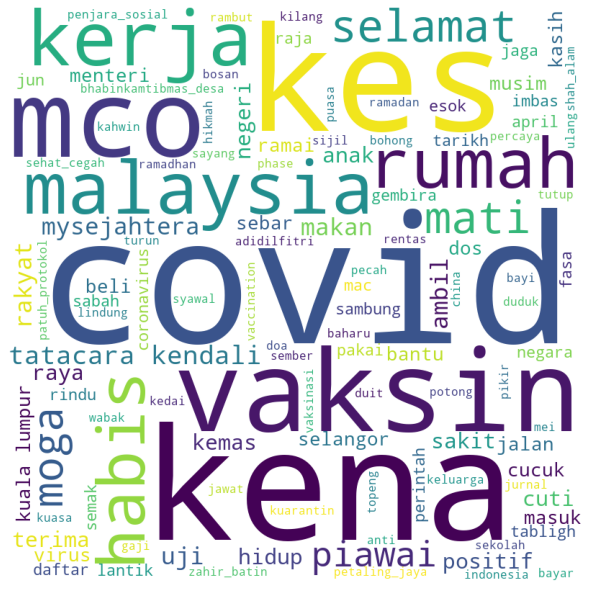

In [7]:
import matplotlib.pyplot as plt
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [24]:
words_in_tweet = [tweet.lower().split(', ') for tweet in tweet_topic_df['Tweet']]
words_in_tweet

[['covid',
  'malaysia',
  'moga',
  'selamat',
  'kes',
  'perintah',
  'jaga',
  'sakit',
  'doa',
  'virus',
  'mati',
  'mac',
  'wabak',
  'bantu',
  'rumah',
  'coronavirus',
  'covid',
  'kes',
  'tabligh',
  'malaysia',
  'sayang',
  'kasih',
  'terima',
  'sebar',
  'uji',
  'china',
  'kemas',
  'mco',
  'kerja',
  'virus',
  'covid',
  'rumah',
  'mco',
  'habis',
  'kena',
  'makan',
  'kerja',
  'duduk',
  'april',
  'musim',
  'tabligh',
  'anak',
  'raya',
  'cuti',
  'beli\n'],
 ['kuala',
  'lumpur',
  'malaysia',
  'raya',
  'mysejahtera',
  'mei',
  'shah_alam',
  'covid',
  'makan',
  'mco',
  'selamat',
  'bosan',
  'hikmah',
  'imbas',
  'petaling_jaya',
  'penjara_sosial',
  'selamat',
  'raya',
  'fasa',
  'puasa',
  'mco',
  'rumah',
  'gembira',
  'phase',
  'ramadan',
  'rindu',
  'syawal',
  'april',
  'adidilfitri',
  'habis',
  'zahir_batin',
  'covid',
  'kes',
  'uji',
  'malaysia',
  'jun',
  'piawai',
  'tatacara',
  'kendali',
  'mco',
  'kena',
  'pos

In [20]:
import itertools
from itertools import permutations, combinations
import collections

In [35]:
# List of all words across tweets
all_words_tweet_topic = list(itertools.chain(*words_in_tweet))

# Create counter
counts_word_freq = collections.Counter(all_words_tweet_topic)

counts_word_freq.most_common(30)

[('covid', 20),
 ('kena', 15),
 ('kes', 13),
 ('vaksin', 13),
 ('mco', 12),
 ('kerja', 12),
 ('malaysia', 11),
 ('rumah', 10),
 ('habis', 9),
 ('selamat', 7),
 ('mati', 7),
 ('moga', 6),
 ('piawai', 6),
 ('tatacara', 6),
 ('kendali', 6),
 ('uji', 5),
 ('makan', 5),
 ('mysejahtera', 5),
 ('rakyat', 5),
 ('ambil', 5),
 ('sakit', 4),
 ('terima', 4),
 ('kemas', 4),
 ('anak', 4),
 ('raya', 4),
 ('cuti', 4),
 ('positif', 4),
 ('hidup', 4),
 ('negeri', 4),
 ('virus', 3)]

In [40]:
tweets_topic = pd.DataFrame(counts_word_freq.most_common(50),
                             columns=['words', 'count'])

tweets_topic

,words,count
0,covid,20
1,kena,15
2,kes,13
3,vaksin,13
4,mco,12
5,kerja,12
6,malaysia,11
7,rumah,10
8,habis,9
9,selamat,7


## 4.2 Top 50 Topic Words in Tweets

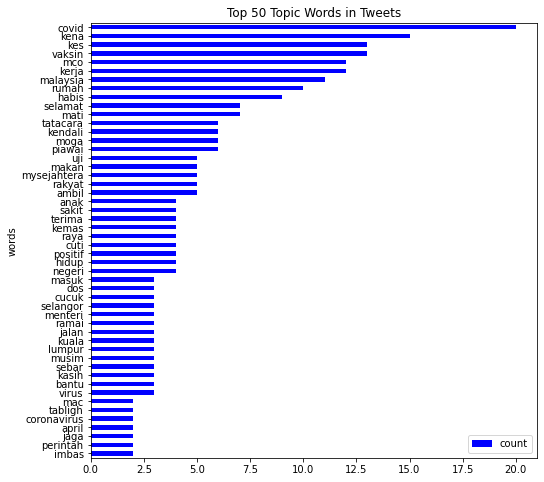

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
tweets_topic.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Top 50 Topic Words in Tweets")

plt.show()

## 5.0 Topic Distribution

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#10.-Word-Counts-of-Topic-Keywords

## 5.1 Dominant topic and its percentage contribution in each document

In [273]:
tweets_full_list_text = tweets_full_list['bigram_token_list'].tolist()
tweets_full_list_text

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['rendah',
  'hati',
  'terima',
  'watikah',
  'lantik',
  'panel',
  'nasihat',
  'salah',
  'fakulti',
  'universiti',
  'muka',
  'asia',
  'universiti_malaya'],
 ['ambil',
  'umur',
  'umur',
  'jun',
  'vaksin',
  'sihat',
  'selesema',
  'early',
  'oktober',
  'early',
  'nov',
  'mata',
  'mendung',
  'syak',
  'fip',
  'lumpuh'],
 ['vaksin'],
 ['hantar',
  'anak',
  'sekolah',
  'salinan',
  'rekod',
  'imunisasi',
  'anak',
  'anti',
  'vaksin',
  'hantar',
  'anak',
  'sekolah',
  'macamana',
  'risau',
  'hantar',
  'anak',
  'sekolah',
  'benak'],
 ['kenal',
  'sek',
  'sek',
  'gaya',
  'jenis',
  'menyembang',
  'bahasa',
  'konon',
  'sevice',
  'rawat',
  'sunnah',
  'puak',
  'anti',
  'vaksin',
  'suruh',
  'makan',
  'makan',
  'sunnah'],
 ['kena', 'masuk', 'jalan', 'tabligh', 'kena'],
 ['pabila',
  'asyik',
  'cakap',
  'stigma',
  'vaksin',
  'cure',
  'sumber',
  'ivdu',
  'seksual',
  'kank',
  'pendek',
  'stigma',
  'jaga',
  'selagi',
  'masyarakat',
  'pan

In [274]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_tfidf, texts= tweets_full_list_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5610,"vaksin, covid, dos, cucuk, uji, do, indonesia,...","[rendah, hati, terima, watikah, lantik, panel,..."
1,1,3.0,0.3790,"vaksin, mysejahtera, covid, rakyat, raja, kena...","[ambil, umur, umur, jun, vaksin, sihat, selese..."
2,2,1.0,0.6197,"vaksin, covid, dos, cucuk, uji, do, indonesia,...",[vaksin]
3,3,2.0,0.5050,"habis, kena, vaksin, kerja, makan, rumah, beli...","[hantar, anak, sekolah, salinan, rekod, imunis..."
4,4,3.0,0.4985,"vaksin, mysejahtera, covid, rakyat, raja, kena...","[kenal, sek, sek, gaya, jenis, menyembang, bah..."
...,...,...,...,...,...
300273,300273,3.0,0.3873,"vaksin, mysejahtera, covid, rakyat, raja, kena...","[singaporean, dunia, kelas, medical, khidmat, ..."
300274,300274,2.0,0.4543,"habis, kena, vaksin, kerja, makan, rumah, beli...","[diffenz, selagi, sok, pos, covid, shah_alam, ..."
300275,300275,3.0,0.3833,"vaksin, mysejahtera, covid, rakyat, raja, kena...","[provokasi, vaksin, remaja, laju, sambut, gala..."
300276,300276,3.0,0.3630,"vaksin, mysejahtera, covid, rakyat, raja, kena...","[uji, jurutera, pil, horse, horse, parasites, ..."


## 5.2 Topic Distribution across docuements

- https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
- https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document

In [275]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,1.0,"vaksin, covid, dos, cucuk, uji, do, indonesia,...",70076.0,0.2334
1.0,3.0,"vaksin, mysejahtera, covid, rakyat, raja, kena...",40172.0,0.1338
2.0,1.0,"vaksin, covid, dos, cucuk, uji, do, indonesia,...",91863.0,0.3059
3.0,2.0,"habis, kena, vaksin, kerja, makan, rumah, beli...",98167.0,0.3269
4.0,3.0,"vaksin, mysejahtera, covid, rakyat, raja, kena...",NaN,NaN


In [276]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(df_dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
df_dominant_topic_in_each_doc

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,count
0,0.0,70076
1,1.0,40172
2,2.0,91863
3,3.0,98167


In [277]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in optimal_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 15]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', '.join)
df_top3words.reset_index(level=0,inplace=True)
df_top3words



C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_id,words
0,0,"kes, mco, covid, moga, malaysia, selamat, vaks..."
1,1,"vaksin, covid, dos, cucuk, uji, do, indonesia,..."
2,2,"habis, kena, vaksin, kerja, makan, rumah, beli..."
3,3,"vaksin, mysejahtera, covid, rakyat, raja, kena..."


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


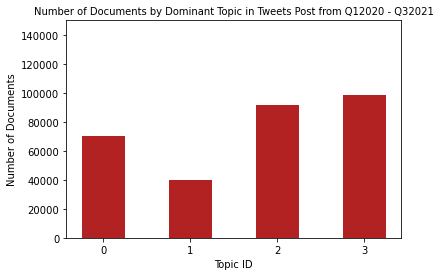

In [278]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Plot
plt.plot()

# Topic Distribution by Dominant Topics
plt.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
plt.xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))

#tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
#plt.xaxis.set_major_formatter(tick_formatter)
plt.title('Number of Documents by Dominant Topic in Tweets Post from Q12020 - Q32021', fontdict=dict(size=10))
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.ylim(0, 150000)


# plt.xscale('log') 
# plt.xlabel('GDP per Capita [in USD]')
# plt.ylabel('Life Expectancy [in years]')
# plt.title('World Development in 2007')

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()